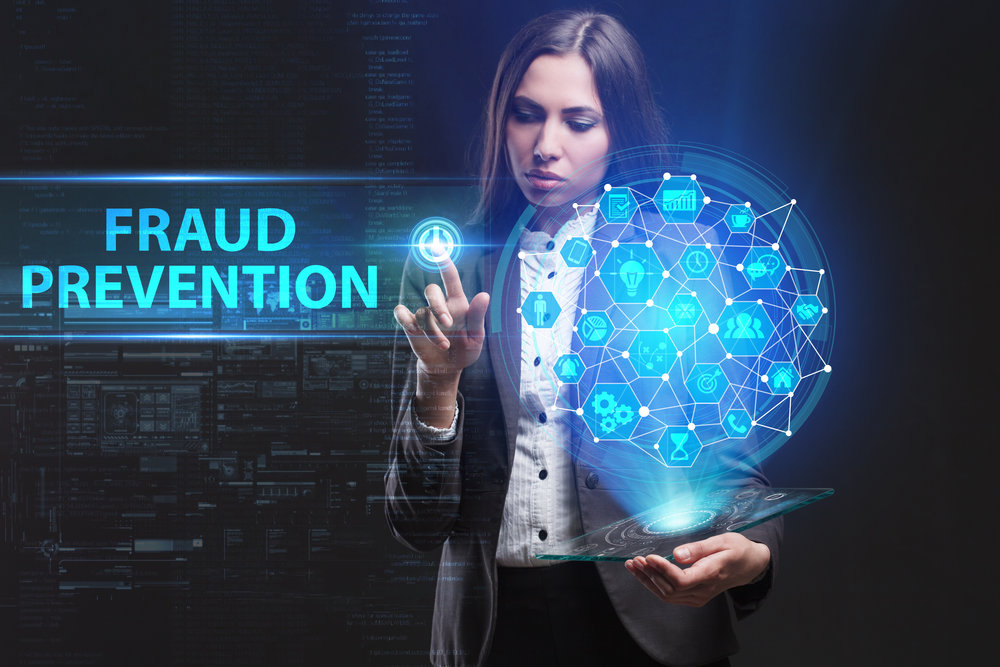

## Aim: Predicting if an insurance claim is fraudulent or not 

### Problem Statement:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

##### Import Required library

In [1]:
# impoting all the required library
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

### Loading Data 

In [2]:
data= pd.read_csv(r"G:\Intershop_21\DataTrained Project\Evaluation Projects\Insurance Claim Fraud Deection\Automobile_insurance_fraud.csv")

In [3]:
data

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
data.head()     # Checking the first five rows of the data.

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [6]:
data.tail()     # Checking the last five rows of the data.

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
995    22-02-2015  Single Vehicle Collision  Front Collision   
996    24-01-2015  Single Vehicle Collision   Rear Collision   
997    23-01-2015   Multi-vehicle Collision   Side Collision   
998    26-02-2015  Single Vehicle Collision   Rear Collision   
999    26-02-2015                Parked Car                ?   

    incident_severity authorities_contacted incident_state incident_city  \
995      Minor Damage                  Fire             NC    Northbrook   
996      Major Damage                  Fire             SC     Northbend   
997      Minor Damage                Police             NC     Arlington   
998      Major Damage                 Other             NY     Arlington   
999      Minor Damage                Police             WV      Columbus   

       incident_location  incident_hour_of_the_day  \
995   6045 Andromedia St                        20   
996     3092 Texas Drive                        23   
997          7629 5th St                         4   
998        6128 Elm Lane                         2   
999  1416 Cherokee Ridge                         6   

     number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
995                            1             YES                0          1   
996                            1             YES                2          3   
997                            3               ?                2          3   
998                            1               ?                0          1   
999                            1               ?                0          3   

    police_report_available  total_claim_amount  injury_claim  property_claim  \
995                       ?               87200         17440            8720   
996                       ?              108480         18080           18080   
997                     YES               67500          7500            7500   
998                     YES               46980          5220            5220   
999                       ?                5060           460             920   

     vehicle_claim   auto_make auto_model  auto_year fraud_r

In [7]:
data.sample(5)     # Checking the random five rows of the data.

months_as_customer  age  policy_number policy_bind_date policy_state  \
397                 252   46         932097       06-09-2005           IN   
565                 392   50         556415       22-08-1991           OH   
252                 242   40         118137       10-02-1998           OH   
687                 194   41         238196       15-02-1993           IL   
983                  17   39         774895       28-10-2006           IL   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
397    100/300               1000                1242.02               0   
565    100/300               2000                1108.97               0   
252    100/300                500                1238.65               0   
687    250/500                500                1203.81               0   
983    250/500               1000                 840.95               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
397       601961        MALE                 Masters       adm-clerical   
565       431496      FEMALE                     PhD    exec-managerial   
252       468702      FEMALE             High School   transport-moving   
687       613119        MALE                      JD   transport-moving   
983       431202      FEMALE                      JD       adm-clerical   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
397         dancing                 wife              0        -28800   
565        exercise        not-in-family          68400        -66800   
252  bungie-jumping              husband              0        -44600   
687     video-games        not-in-family          52500        -51300   
983          hiking            unmarried          32500        -80800   

    incident_date             incident_type   collision_type  \
397    08-02-2015  Single Vehicle Collision  Front Collision   
565    14-01-2015  Single Vehicle Collision   Side Collision   
252    27-01-2015             Vehicle Theft                ?   
687    06-02-2015   Multi-vehicle Collision   Rear Collision   
983    26-02-2015                Parked Car                ?   

    incident_severity authorities_contacted incident_state incident_city  \
397      Minor Damage                  Fire             VA     Hillsdale   
565      Minor Damage                 Other             WV   Springfield   
252    Trivial Damage                Police             WV   Springfield   
687      Minor Damage                Police             WV   Springfield   
983    Trivial Damage                Police             SC     Arlington   

      incident_location  incident_hour_of_the_day  \
397      6390 Apache St                        17   
565      1248 MLK Ridge                         4   
252    9744 Texas Drive                         5   
687  3555 Francis Ridge                        17   
983    7042 Maple Ridge                         9   

     number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
397                            1             YES                0          2   
565                            1              NO                2          2   
252                            1             YES                1          1   
687                            3               ?                0          2   
983                            1               ?                2          1   

    police_report_available  total_claim_amount  injury_claim  property_claim  \
397                     YES               74900         14980            7490   
565                     YES              108030         16620           16620   
252                      NO                7480           680             680   
687                       ?               95900         13700           20550   
983                       ?                3440           430             430   

     vehicle_claim auto_make      auto_model  auto_year fraud_repo

In [8]:
data.shape

(1000, 40)

In [9]:
data.info()     # Cheking the info of the all columns and aslo the overview.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### Data Description:

1. Data Having 1000 entries, 0 to 999  
2. Data is ahving 1000 Rows and 40 Columns. 
3. All the columns are having 1000 Non-Null value, only _c39 is having all the data as Null. 
4. Data having 2 float , 17 integer and 21 object columns. 
5. In some columns we have "?", which is need to be treated further. 
6. memory usage: 312.6+ KB

### Checking Null Values

In [10]:
data.isnull().sum()     # Checking null values are present in dataset or not.

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

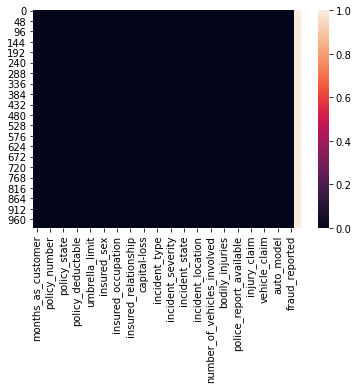

In [11]:
sns.heatmap(data.isnull())     # Checking null values are present in dataset or not with the help of Seaborn(heatmap).

Here we can see data all the coulumns are having 1000 rows , only _c39 is having all the value as Nan,  
Here we will drop this column  

In [12]:
# Droping _c39 column 
data.drop('_c39', axis= 1, inplace= True )

In [13]:
# Checkign Duplicated values. 
data.duplicated().sum() 

0

Checkign any space or '?' , values filled in the columns

In [14]:
#Checkign any sapce values present in the columns 
data.isin([" "]).sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [15]:
#Checkign any '? ' values present in the columns 
data.isin(["?"]).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

Here we can see 3 columns are having data filled with '?'
collision_type - 178   
property_damage - 360   
police_report_available - 343

In [16]:
#Replacing data with Nan 
data.replace(to_replace="?", value=np.nan, inplace= True)

In [17]:
data.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

Now data is having Nan as we replaced "?" with Nan,   
We will not drop these columns, we will fill the values 

###### Missing values treatment

In [18]:
# we will fill the nan by the most common collision type using Mode of the that column 
data['collision_type'].fillna(data['collision_type'].mode()[0], inplace = True)

#we will fill the nan by the most common property_damage,  using Mode of the that column 
data['property_damage'].fillna(data['property_damage'].mode()[0], inplace = True)

# we will fill the nan by the most police_report_available,  using Mode of the that column
data['police_report_available'].fillna(data['police_report_available'].mode()[0], inplace = True)


In [19]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

Now data is not having any Null values. 

In [20]:
data.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

## Data Visualizations

### Univariate analysis of the data

Here We will analyse the distribution of our data columns.   
before analysing lets divide dataset in categorical and numerical columns.  

In [21]:
cat_feature= data.select_dtypes(include=[np.object])

Lets first analyse the fraud_reported percentage, we will analyse this using pi chart.

Text(0.5, 1.0, 'Percentage of fraud_reported ')

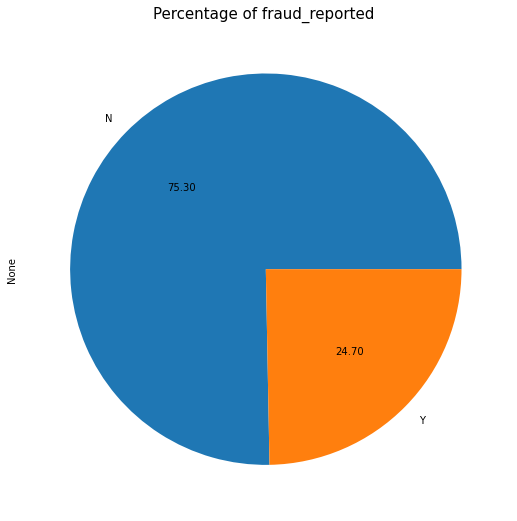

In [22]:
plt.figure(figsize=(15,9))
cat_feature.groupby('fraud_reported').size().plot(kind='pie', autopct='%.2f')
plt.title("Percentage of fraud_reported ", fontsize =15)

Here we can see 24.70  percentage claims reported fraud. 

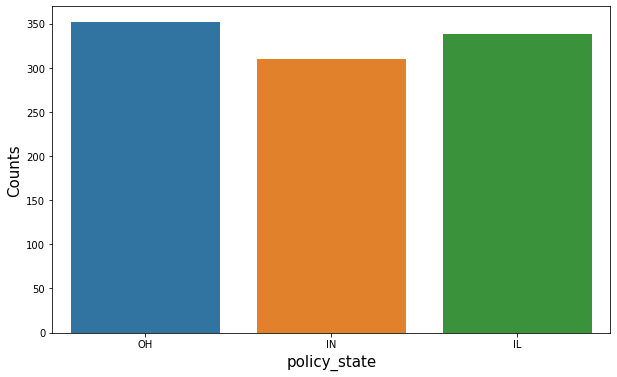

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data['policy_state'])
plt.xlabel('policy_state', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Data is almost equally distributed within all the columns. 

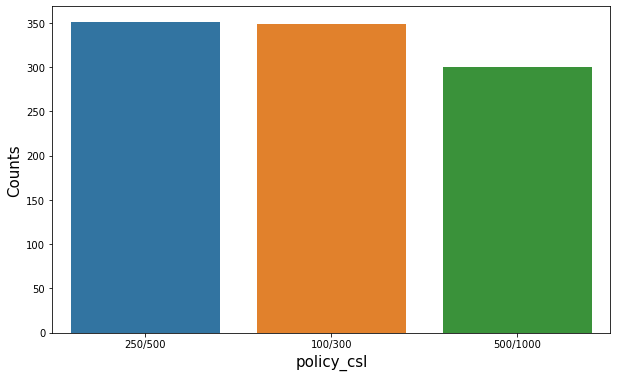

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data['policy_csl'])
plt.xlabel('policy_csl', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

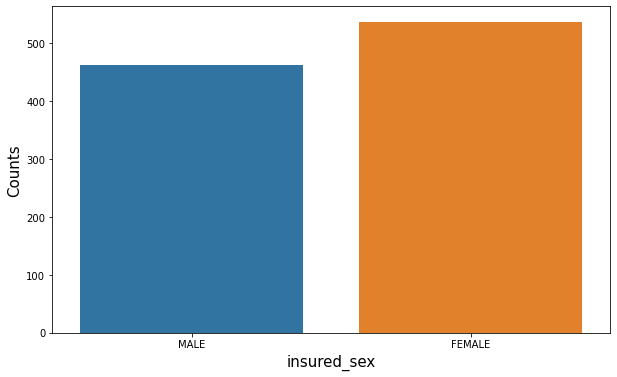

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data['insured_sex'])
plt.xlabel('insured_sex', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

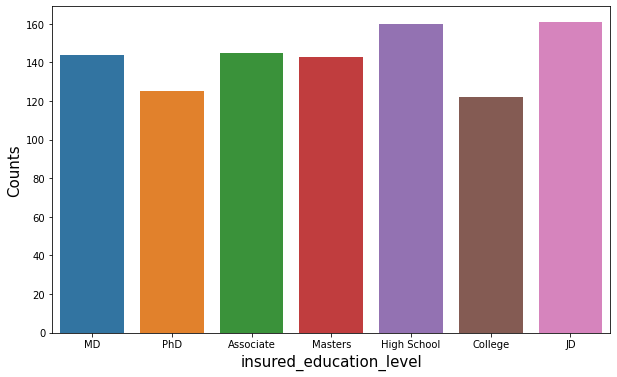

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data['insured_education_level'])
plt.xlabel('insured_education_level', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

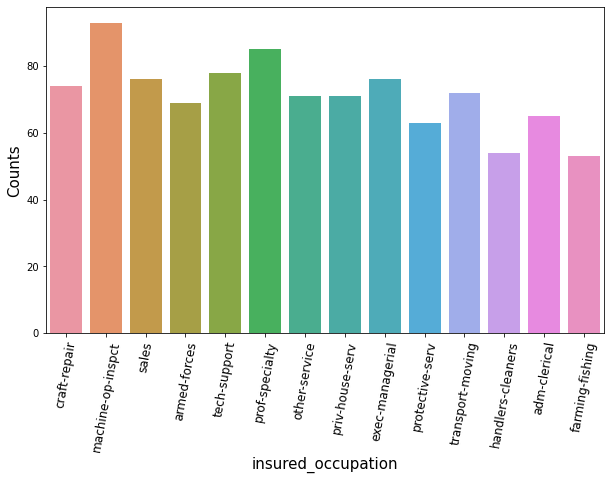

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data['insured_occupation'])
plt.xlabel('insured_occupation', fontsize=15)
plt.ylabel('Counts', fontsize=15)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)

plt.show()

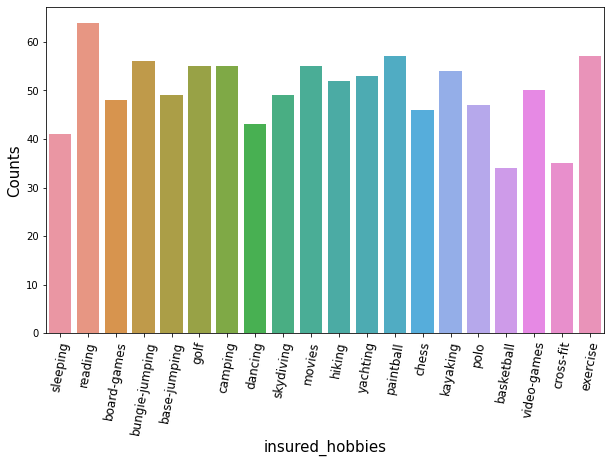

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data['insured_hobbies'])
plt.xlabel('insured_hobbies', fontsize=15)
plt.ylabel('Counts', fontsize=15)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.show()

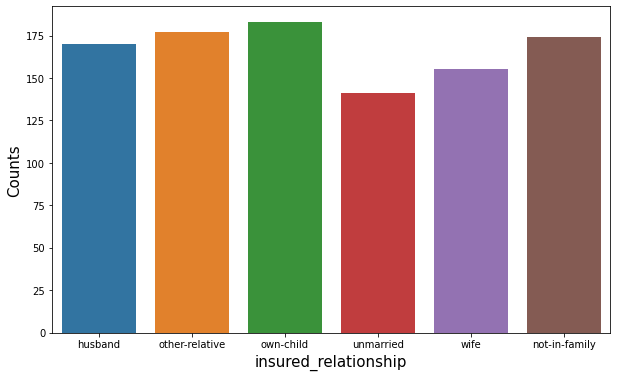

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data['insured_relationship'])
plt.xlabel('insured_relationship', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

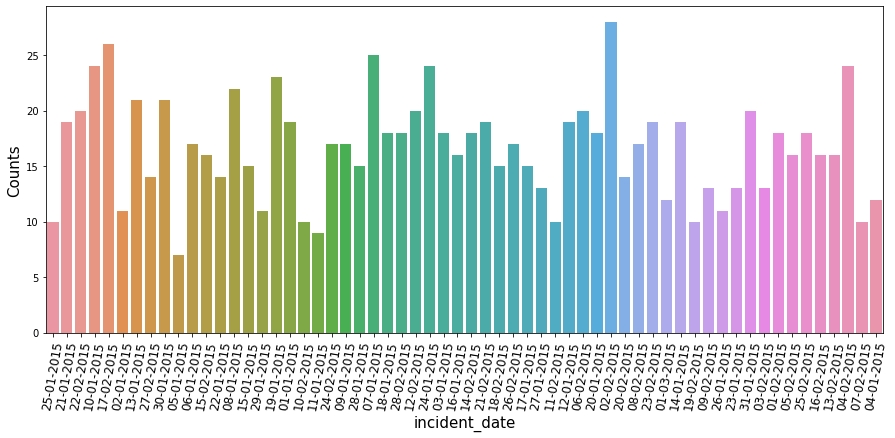

In [30]:
plt.figure(figsize=(15, 6))
sns.countplot(data['incident_date'])
plt.xlabel('incident_date', fontsize=15)
plt.ylabel('Counts', fontsize=15)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)

plt.show()

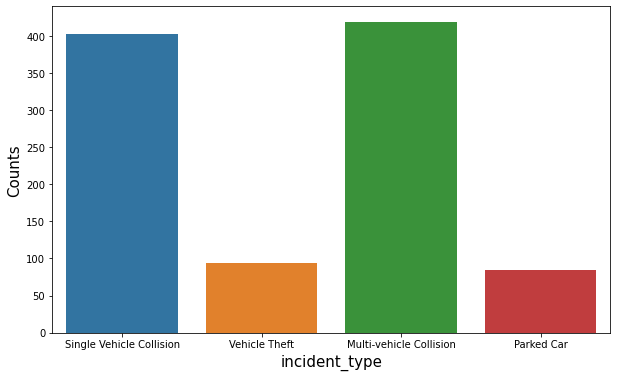

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data['incident_type'])
plt.xlabel('incident_type', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

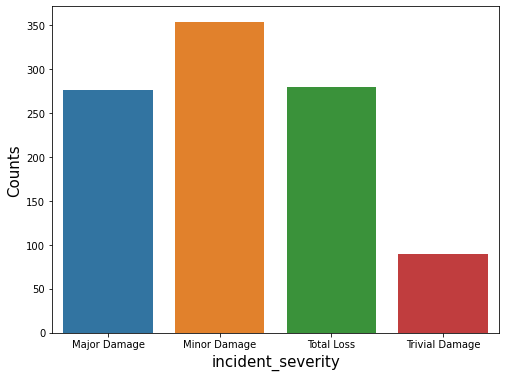

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(data['incident_severity'])
plt.xlabel('incident_severity', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

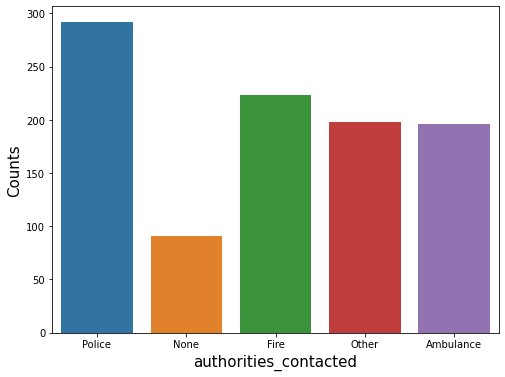

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(data['authorities_contacted'])
plt.xlabel('authorities_contacted', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

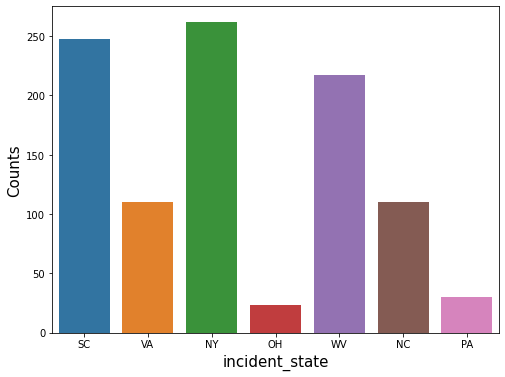

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(data['incident_state'])
plt.xlabel('incident_state', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

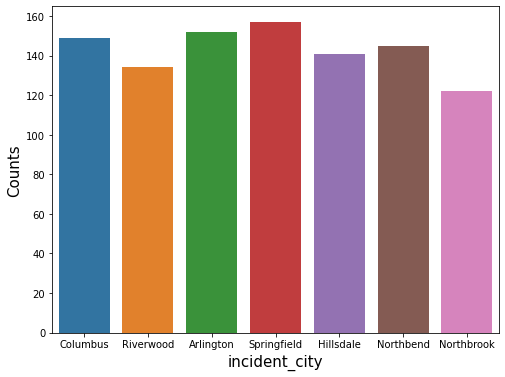

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(data['incident_city'])
plt.xlabel('incident_city', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

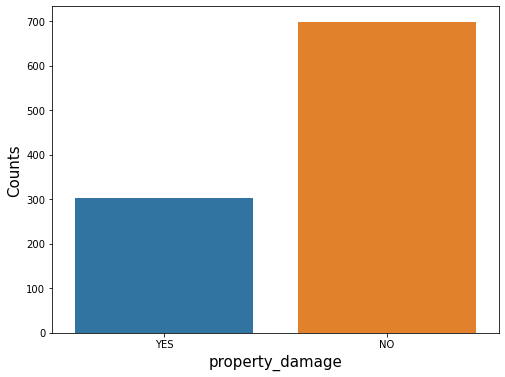

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(data['property_damage'])
plt.xlabel('property_damage', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

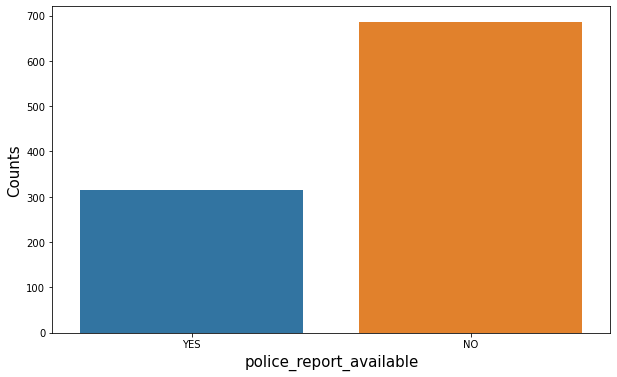

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(data['police_report_available'])
plt.xlabel('police_report_available', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

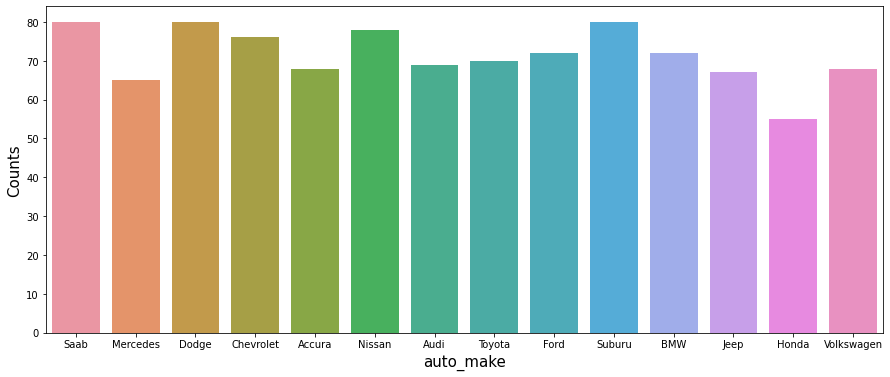

In [38]:
plt.figure(figsize=(15, 6))
sns.countplot(data['auto_make'])
plt.xlabel('auto_make', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

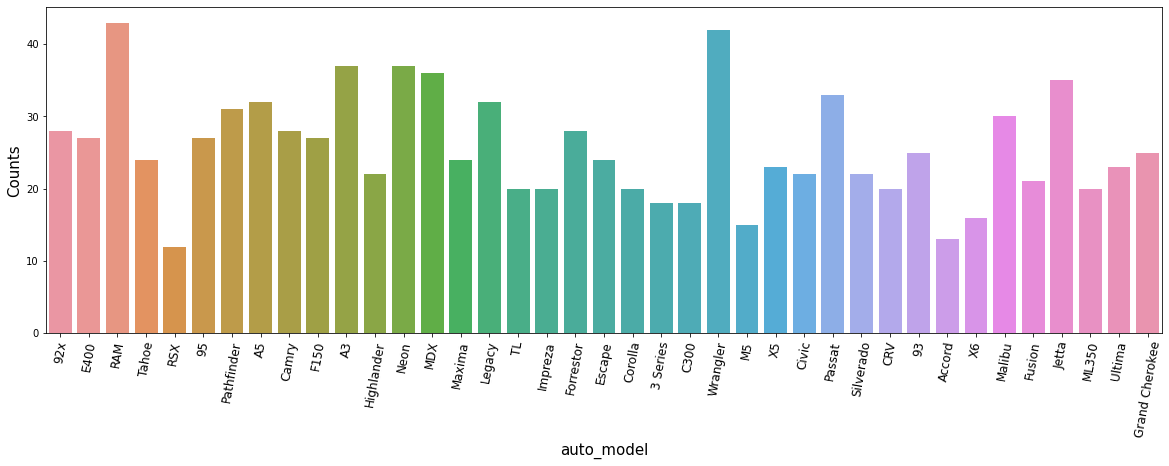

In [39]:
plt.figure(figsize=(20, 6))
sns.countplot(data['auto_model'])
plt.xlabel('auto_model', fontsize=15)
plt.ylabel('Counts', fontsize=15)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)

plt.show()

1. policy_csl: Combined single limit is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability coverage and Property Damage Liability coverage per occurrence or accident. Csl is distributed aslmost equal in all the categories. 

2. Insured_sex : we can see most of the isured are Female. The count is greated than 500

3. Insured_education_level:  High school and JD are same and higher than other numbers, data is distributed is all categories. 

4. insured_occupation: Machine-op-inspct are more in number, after the we have considerable numbers for prof-spefialty, . tech support and  sales.
5. insured_hobbies : Insurred with hobbies as reading are higher in number, so tendency to fraud is higher.
6. insured_relationship : Husband , not in family and other relatives have higher tendency to fraud. 
7. incident_date: we can see 02-02-2015 reported higher incident. 
8. incident_type: We can see Single-vehicle collision and Multi__vehicle- collision are the main incident types. 
9. incident_severity : Numbers with minor damage are high. 
10. authorities_contacted: Most of the cases police is contacted first.  
11. incident_state: Mostly incident happen at NY and SC
12. incident_city : Springfield recoded the higher number of incident
13. property_damage : Near about 700 cases reported no property damage. 
14. police_report_available: For near about 700 cases reported, plocie report not availble.
15. auto_make: Saab, Mercedes and Siburu are most common auto make
16. auto_model: incident report for RAM is higher. 


In [40]:
num_feature= data.select_dtypes(include=[np.number])

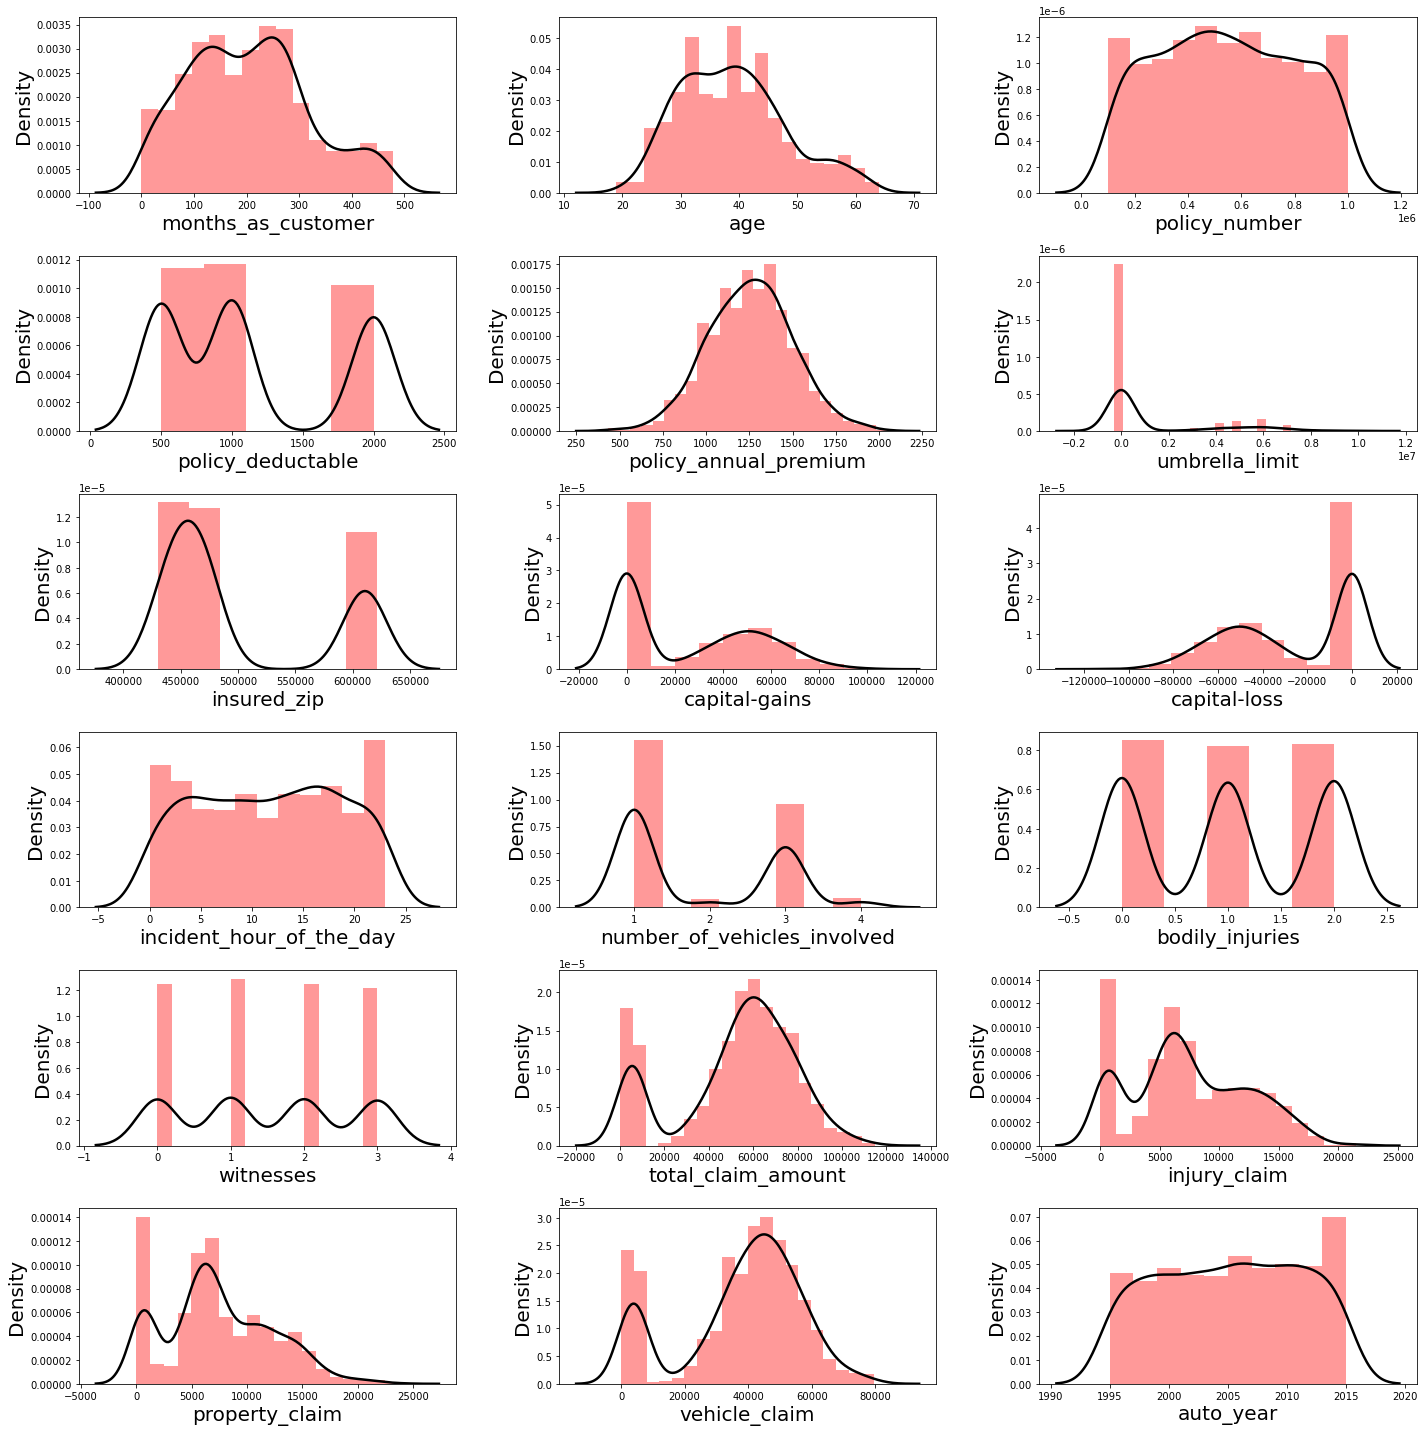

In [41]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber= 1

for column in num_feature:
    if plotnumber<=18:
        ax= plt.subplot(6,3, plotnumber)
        sns.distplot(num_feature[column],color='Red',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
        plt.xlabel(column, fontsize= 20)
        plt.ylabel('Density', fontsize= 20)
    plotnumber+=1
plt.tight_layout()

We can see our data is almost equally distributed. 

### Bi Variate and Multivariate analysis. 

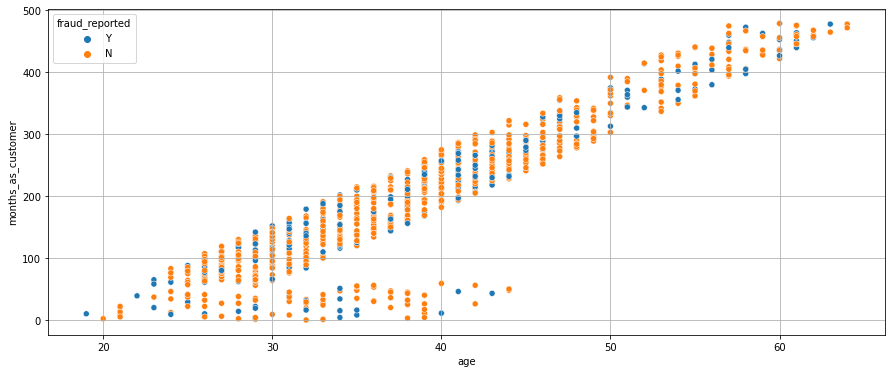

In [42]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='age', y='months_as_customer',hue='fraud_reported',data=data)
plt.grid(True)
plt.show()

We can see there is not pattern which indicates, if the customers with more years with the compnay are clainming fraud insurance.

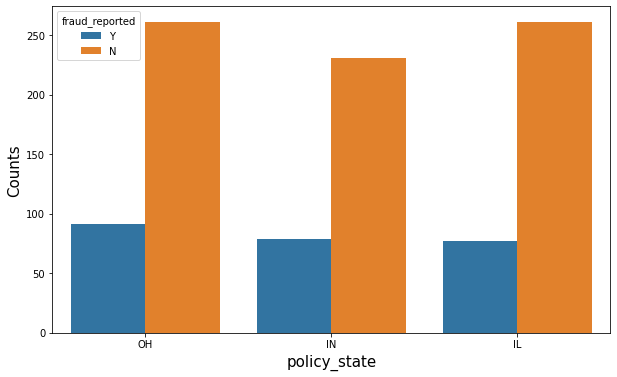

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='policy_state', data= data, hue='fraud_reported')
plt.xlabel('policy_state', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

We can see all the stats equally claiming the Fraud claim

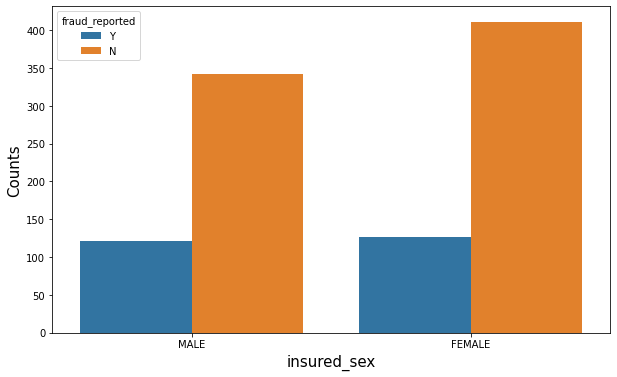

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='insured_sex', data= data, hue='fraud_reported')
plt.xlabel('insured_sex', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

We can see male and female both are equaly claiming the Fraud claim. 

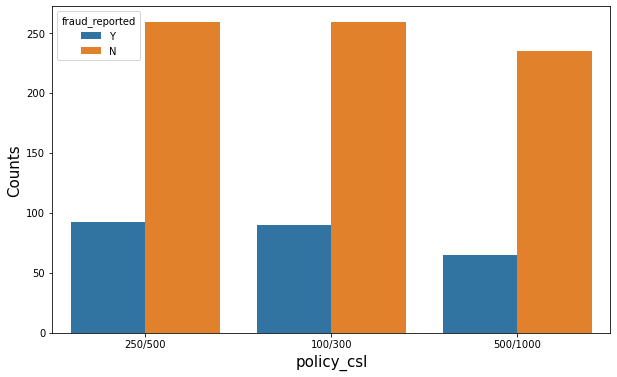

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(x='policy_csl', data= data, hue='fraud_reported')
plt.xlabel('policy_csl', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Fraud claims are more in 250/500 and 100/300 

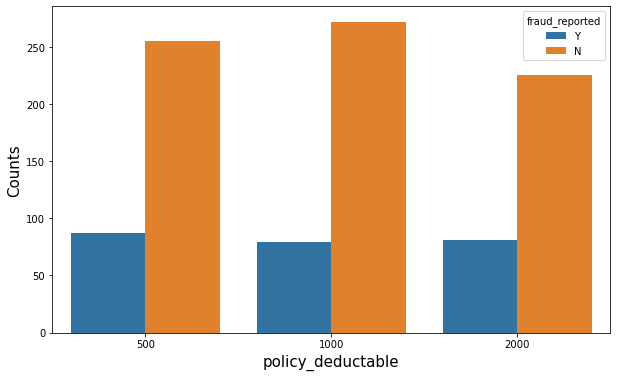

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(x='policy_deductable', data= data, hue='fraud_reported')
plt.xlabel('policy_deductable', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

In all policy_deductable Fraud claims are equal. 

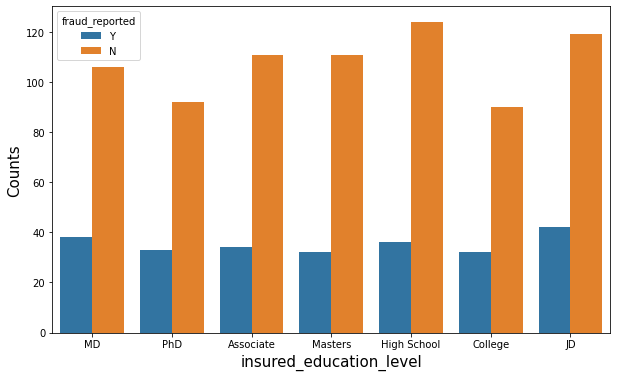

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(x='insured_education_level', data= data, hue='fraud_reported')
plt.xlabel('insured_education_level', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

We can see customers with insured_education_level as JD are more likely to claim fraud insurance

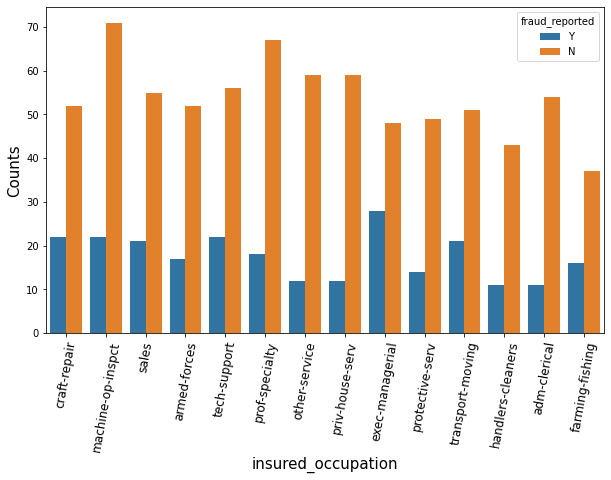

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='insured_occupation', data= data, hue='fraud_reported')
plt.xlabel('insured_occupation', fontsize=15)
plt.ylabel('Counts', fontsize=15)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.show()

Customers with occupation as Exec-managerial are more likely to claim fraud Insurance.

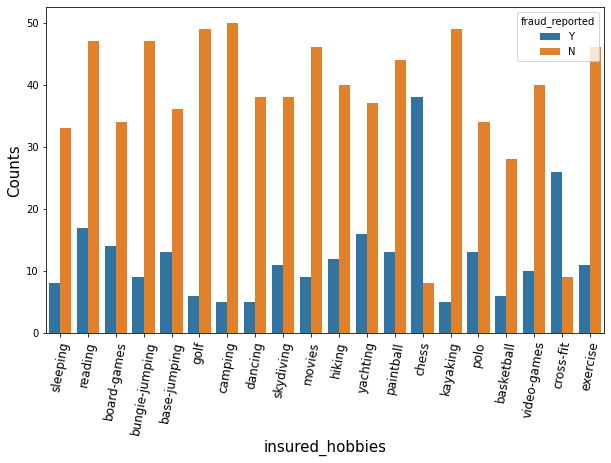

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(x='insured_hobbies', data= data, hue='fraud_reported')
plt.xlabel('insured_hobbies', fontsize=15)
plt.ylabel('Counts', fontsize=15)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.show()

Here we can see customers with hobbies as Chess player  are more likely to claim fraud Insurance. 

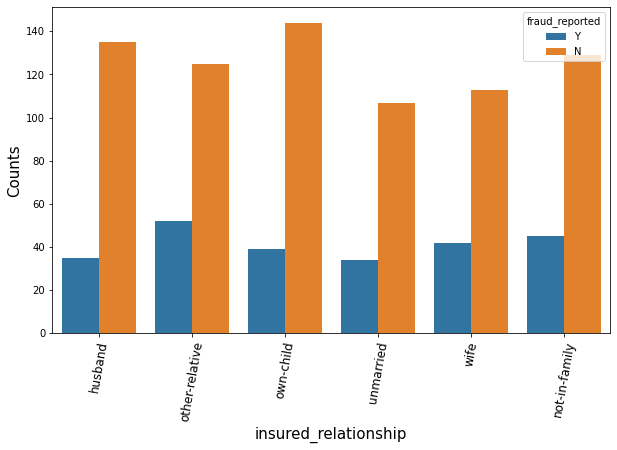

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(x='insured_relationship', data= data, hue='fraud_reported')
plt.xlabel('insured_relationship', fontsize=15)
plt.ylabel('Counts', fontsize=15)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.show()

Other Relatives and Not- in- Family are more likely to claim Fraud Insurance. 

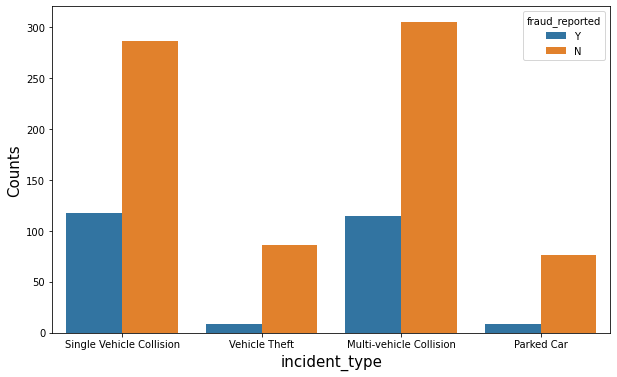

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x='incident_type', data= data, hue='fraud_reported')
plt.xlabel('incident_type', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

In case of Single and Multivehicle collision, chance of Fraud Claim are high. 

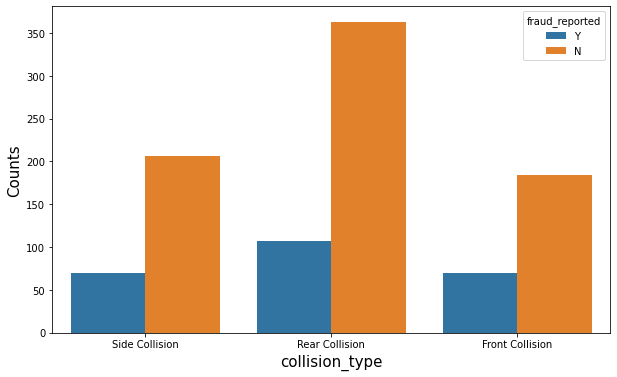

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='collision_type', data= data, hue='fraud_reported')
plt.xlabel('collision_type', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

We can see in case of Rear_collision chances of Fraud calim are higher.

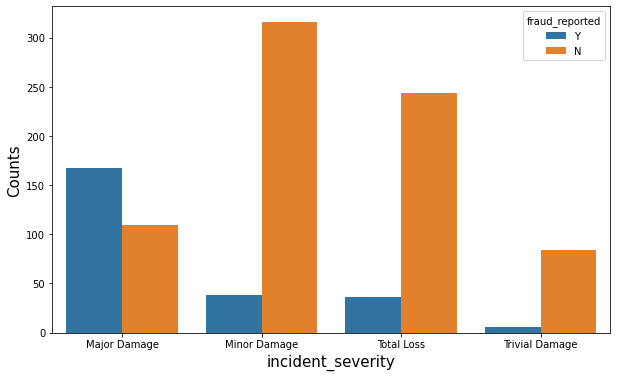

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(x='incident_severity', data= data, hue='fraud_reported')
plt.xlabel('incident_severity', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

Here we can see in case of major damage,  Chances of Fraud claim insurance is highest. 

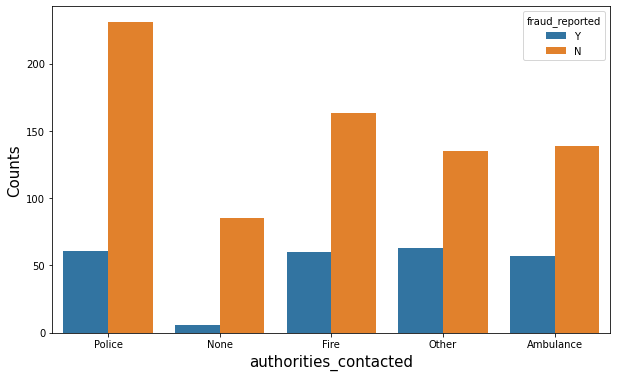

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x='authorities_contacted', data= data, hue='fraud_reported')
plt.xlabel('authorities_contacted', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

Here we can see when the inccident is reported to other, chances of Fraud claims are more.

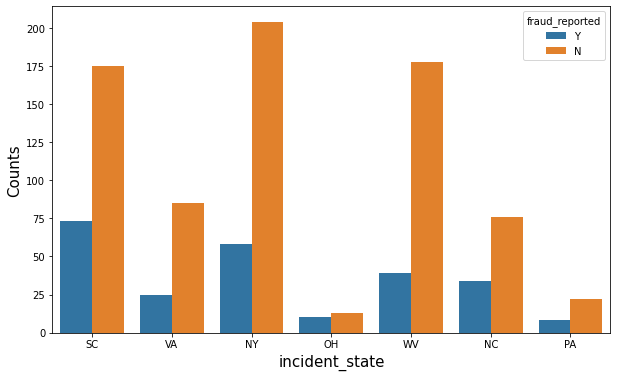

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x='incident_state', data= data, hue='fraud_reported')
plt.xlabel('incident_state', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

SC reported highets numbers of Fraud claims.

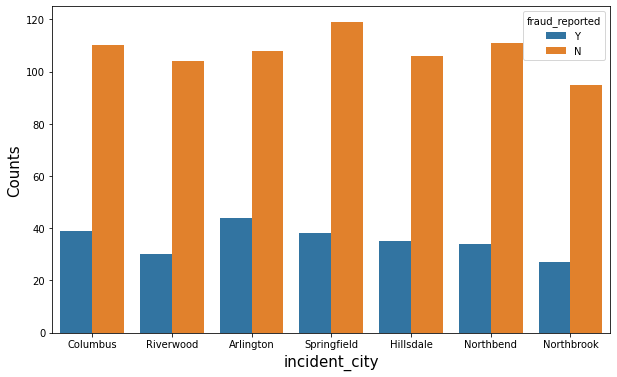

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(x='incident_city', data= data, hue='fraud_reported')
plt.xlabel('incident_city', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

Arlington report higher numebers of false claims.

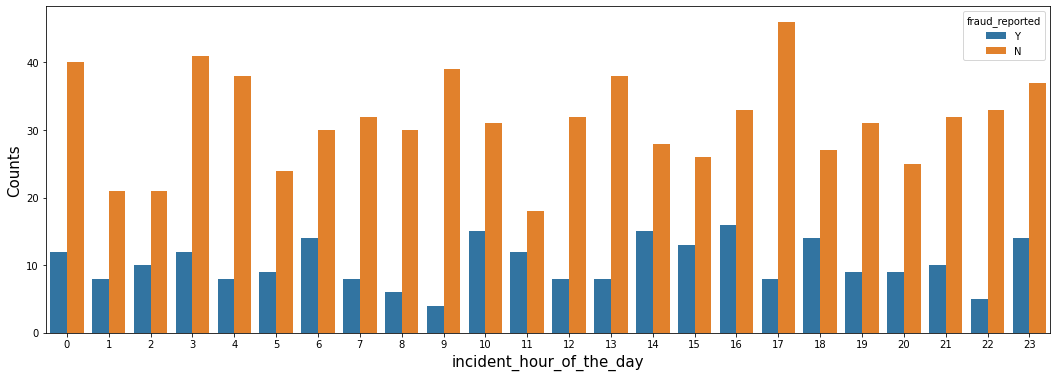

In [57]:
plt.figure(figsize=(18, 6))
sns.countplot(x='incident_hour_of_the_day', data= data, hue='fraud_reported')
plt.xlabel('incident_hour_of_the_day', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

incident_hour_of_the_day are not having very good relation with Fraud Reported 

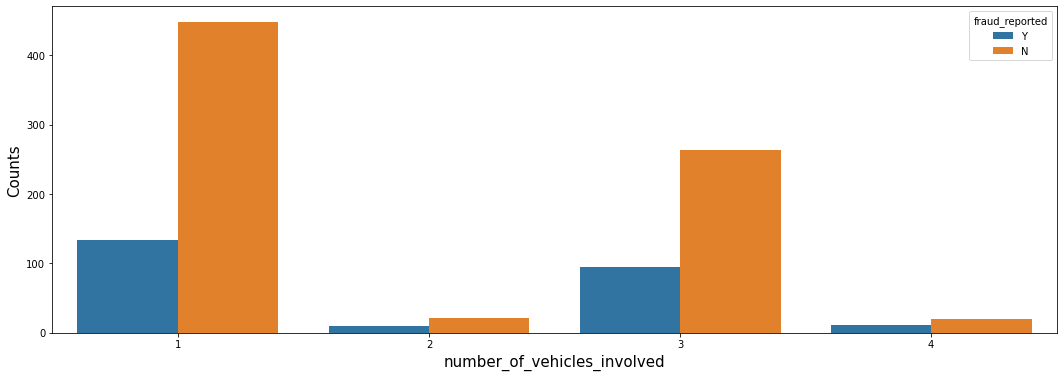

In [58]:
plt.figure(figsize=(18, 6))
sns.countplot(x='number_of_vehicles_involved', data= data, hue='fraud_reported')
plt.xlabel('number_of_vehicles_involved', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

Incident with three vehicles are more likely have Fraud claim

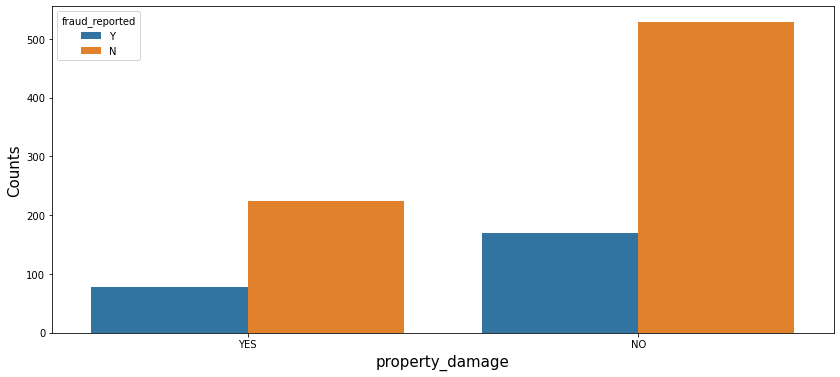

In [59]:
plt.figure(figsize=(14, 6))
sns.countplot(x='property_damage', data= data, hue='fraud_reported')
plt.xlabel('property_damage', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

Fraud claim are reported in case of No property damage.

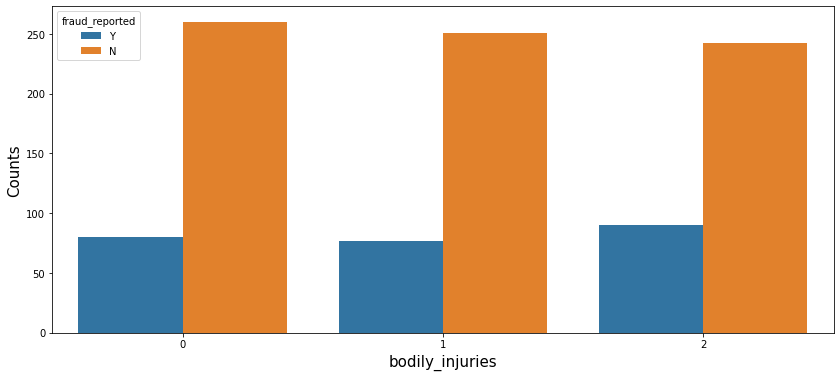

In [60]:
plt.figure(figsize=(14, 6))
sns.countplot(x='bodily_injuries', data= data, hue='fraud_reported')
plt.xlabel('bodily_injuries', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

Here we can see chances for fraud claims are equaly likely. 

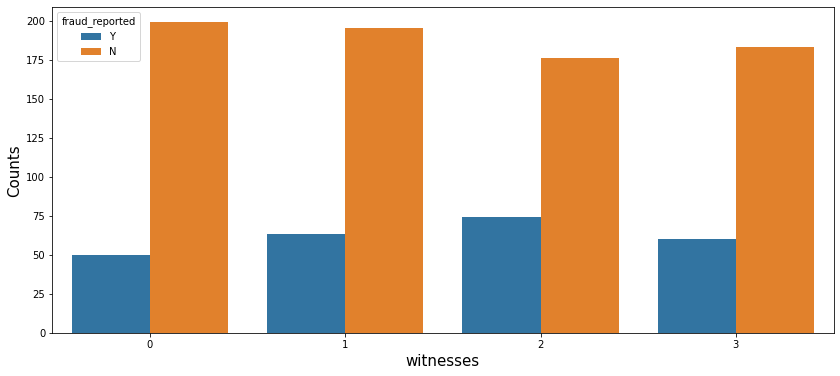

In [61]:
plt.figure(figsize=(14, 6))
sns.countplot(x='witnesses', data= data, hue='fraud_reported')
plt.xlabel('witnesses', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

We can see Incident with 2 witnesses are having more chance of Fraud. 

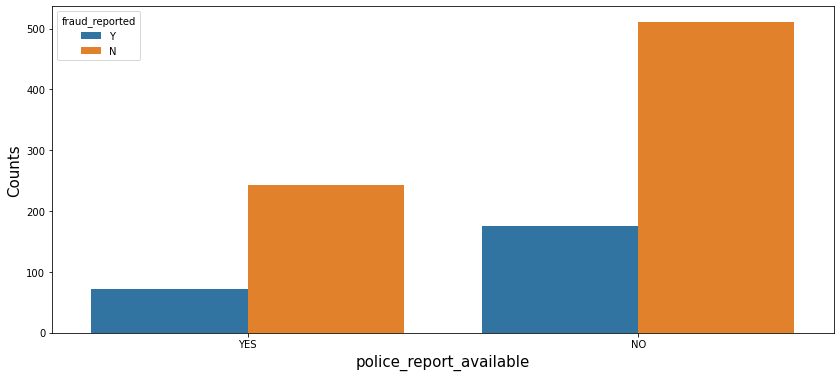

In [62]:
plt.figure(figsize=(14, 6))
sns.countplot(x='police_report_available', data= data, hue='fraud_reported')
plt.xlabel('police_report_available', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

We can see in an incident where police report is not available, chances of fraud claims Increases. 

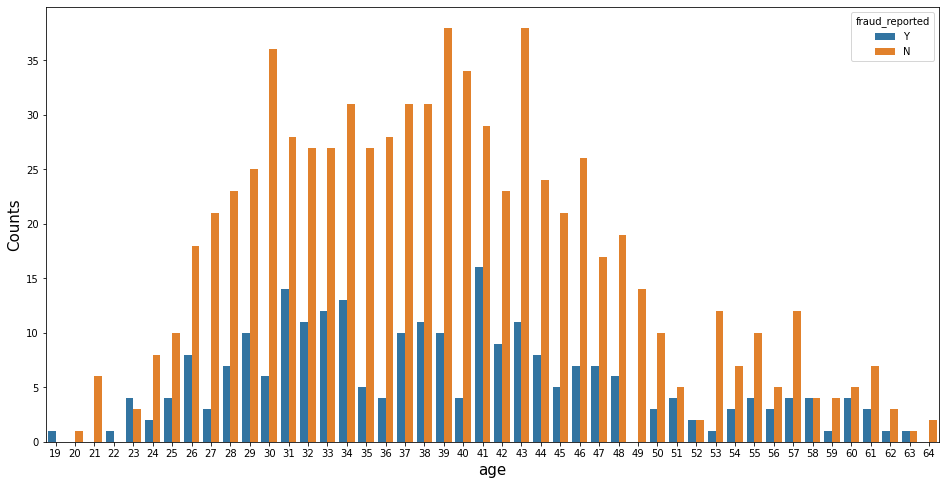

In [63]:
plt.figure(figsize=(16,8))
sns.countplot(x='age', data= data, hue='fraud_reported')
plt.xlabel('age', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

Are group 31 t0 41 are more likely to have Fraud claim.

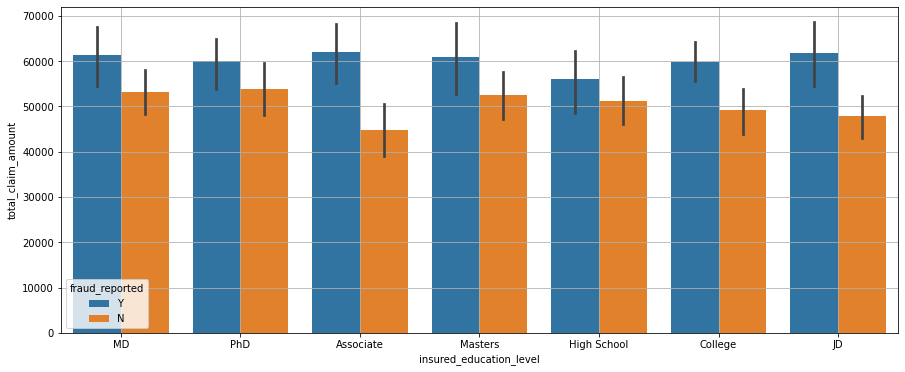

In [64]:
plt.figure(figsize=(15,6))
sns.barplot(x='insured_education_level',y='total_claim_amount',hue='fraud_reported',data=data)
plt.grid(True)
plt.show()

Here we can see Associate , JD, MD and Masters are claiming almost same amount As  Fraud claim Insurance.

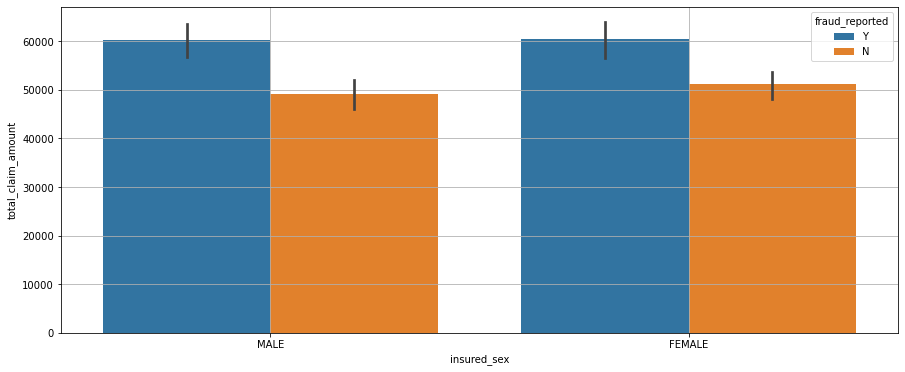

In [65]:
plt.figure(figsize=(15,6))
sns.barplot(x='insured_sex',y='total_claim_amount',hue='fraud_reported',data=data)
plt.grid(True)
plt.show()

Here we can see both males and female claiming same amount, in form of Fraud claim

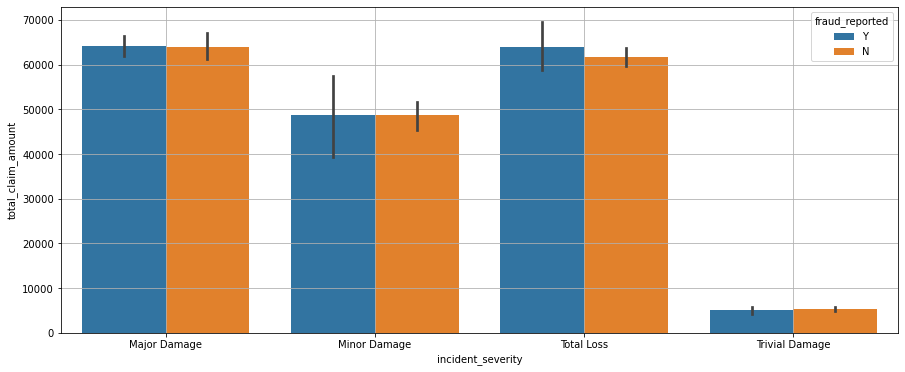

In [66]:
plt.figure(figsize=(15,6))
sns.barplot(x='incident_severity',y='total_claim_amount',hue='fraud_reported',data=data)
plt.grid(True)
plt.show()

False claim in case of Major damage and  Total loss is higher.

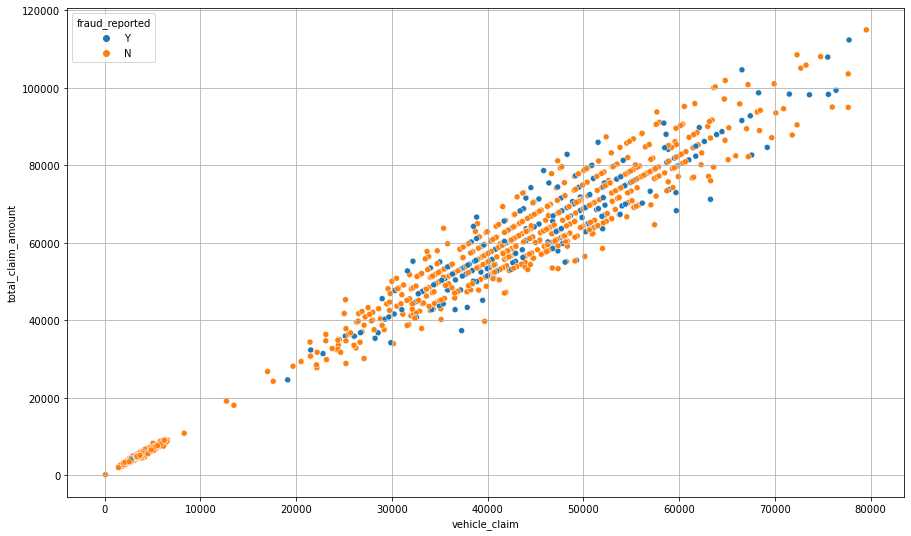

In [67]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='vehicle_claim', y='total_claim_amount',hue='fraud_reported',data=data)
plt.grid(True)
plt.show()

Here we can see there is no direct relation with false claim between vehicle claim and Total claim amaount. 

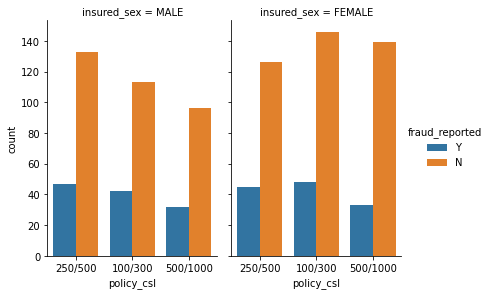

In [68]:
sns.catplot(x="policy_csl", hue="fraud_reported", col="insured_sex", data=data, kind="count",height=4, aspect=.7)

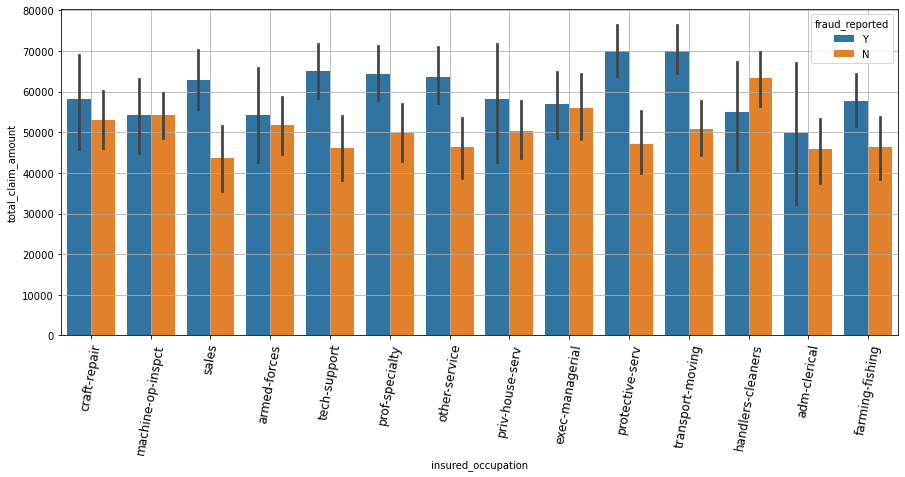

In [69]:
plt.figure(figsize=(15,6))
sns.barplot(x='insured_occupation',y='total_claim_amount',hue='fraud_reported',data=data)
plt.grid(True)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.show()

Here we can see customers with occupation as  Protective Serv and transport moving claimed higher amount. 

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

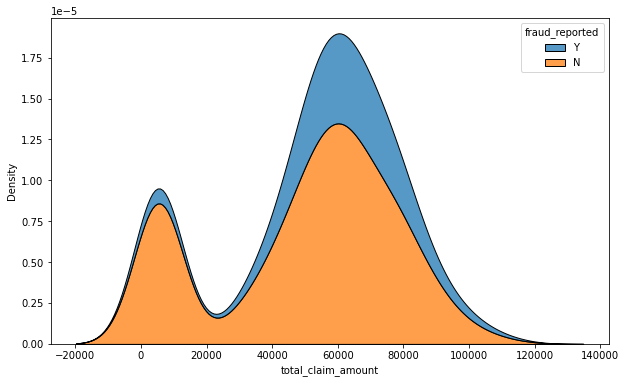

In [70]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = data, x="total_claim_amount", hue="fraud_reported", multiple="stack")

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

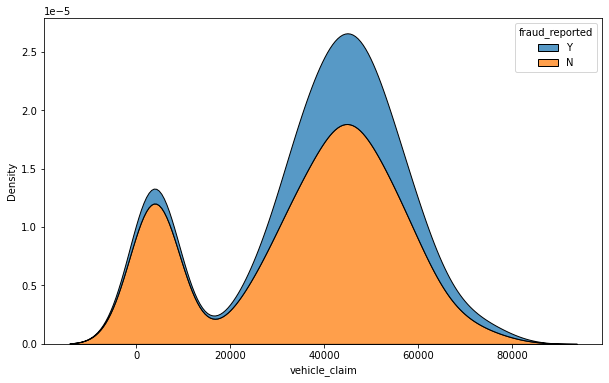

In [71]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = data, x="vehicle_claim", hue="fraud_reported", multiple="stack")

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

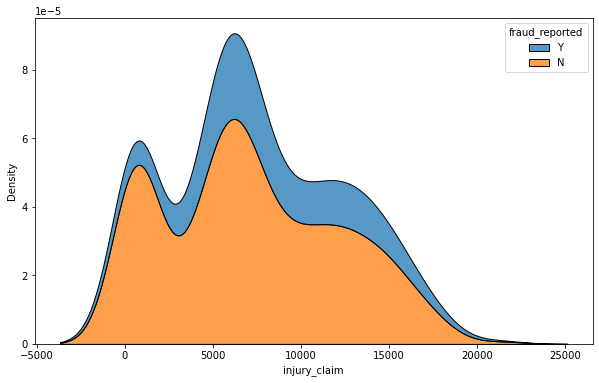

In [72]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = data, x="injury_claim", hue="fraud_reported", multiple="stack")

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

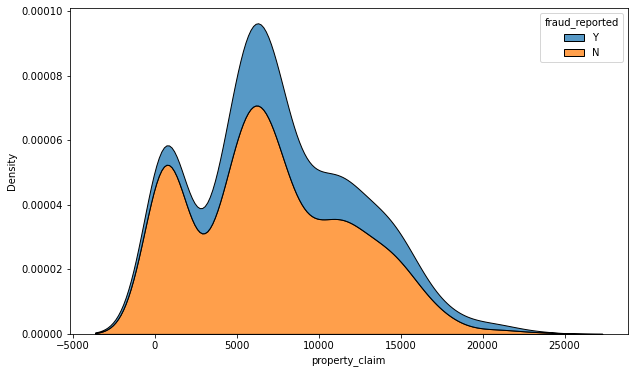

In [73]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = data, x="property_claim", hue="fraud_reported", multiple="stack")

Here we can see total claim and vehicle claim having same kind of pattern and amount claimed is higher at 40000,  
Propertyclaim and injury claim are showing same relation, amount claim is higher between 5000-10000. 

<Figure size 1440x1440 with 0 Axes>

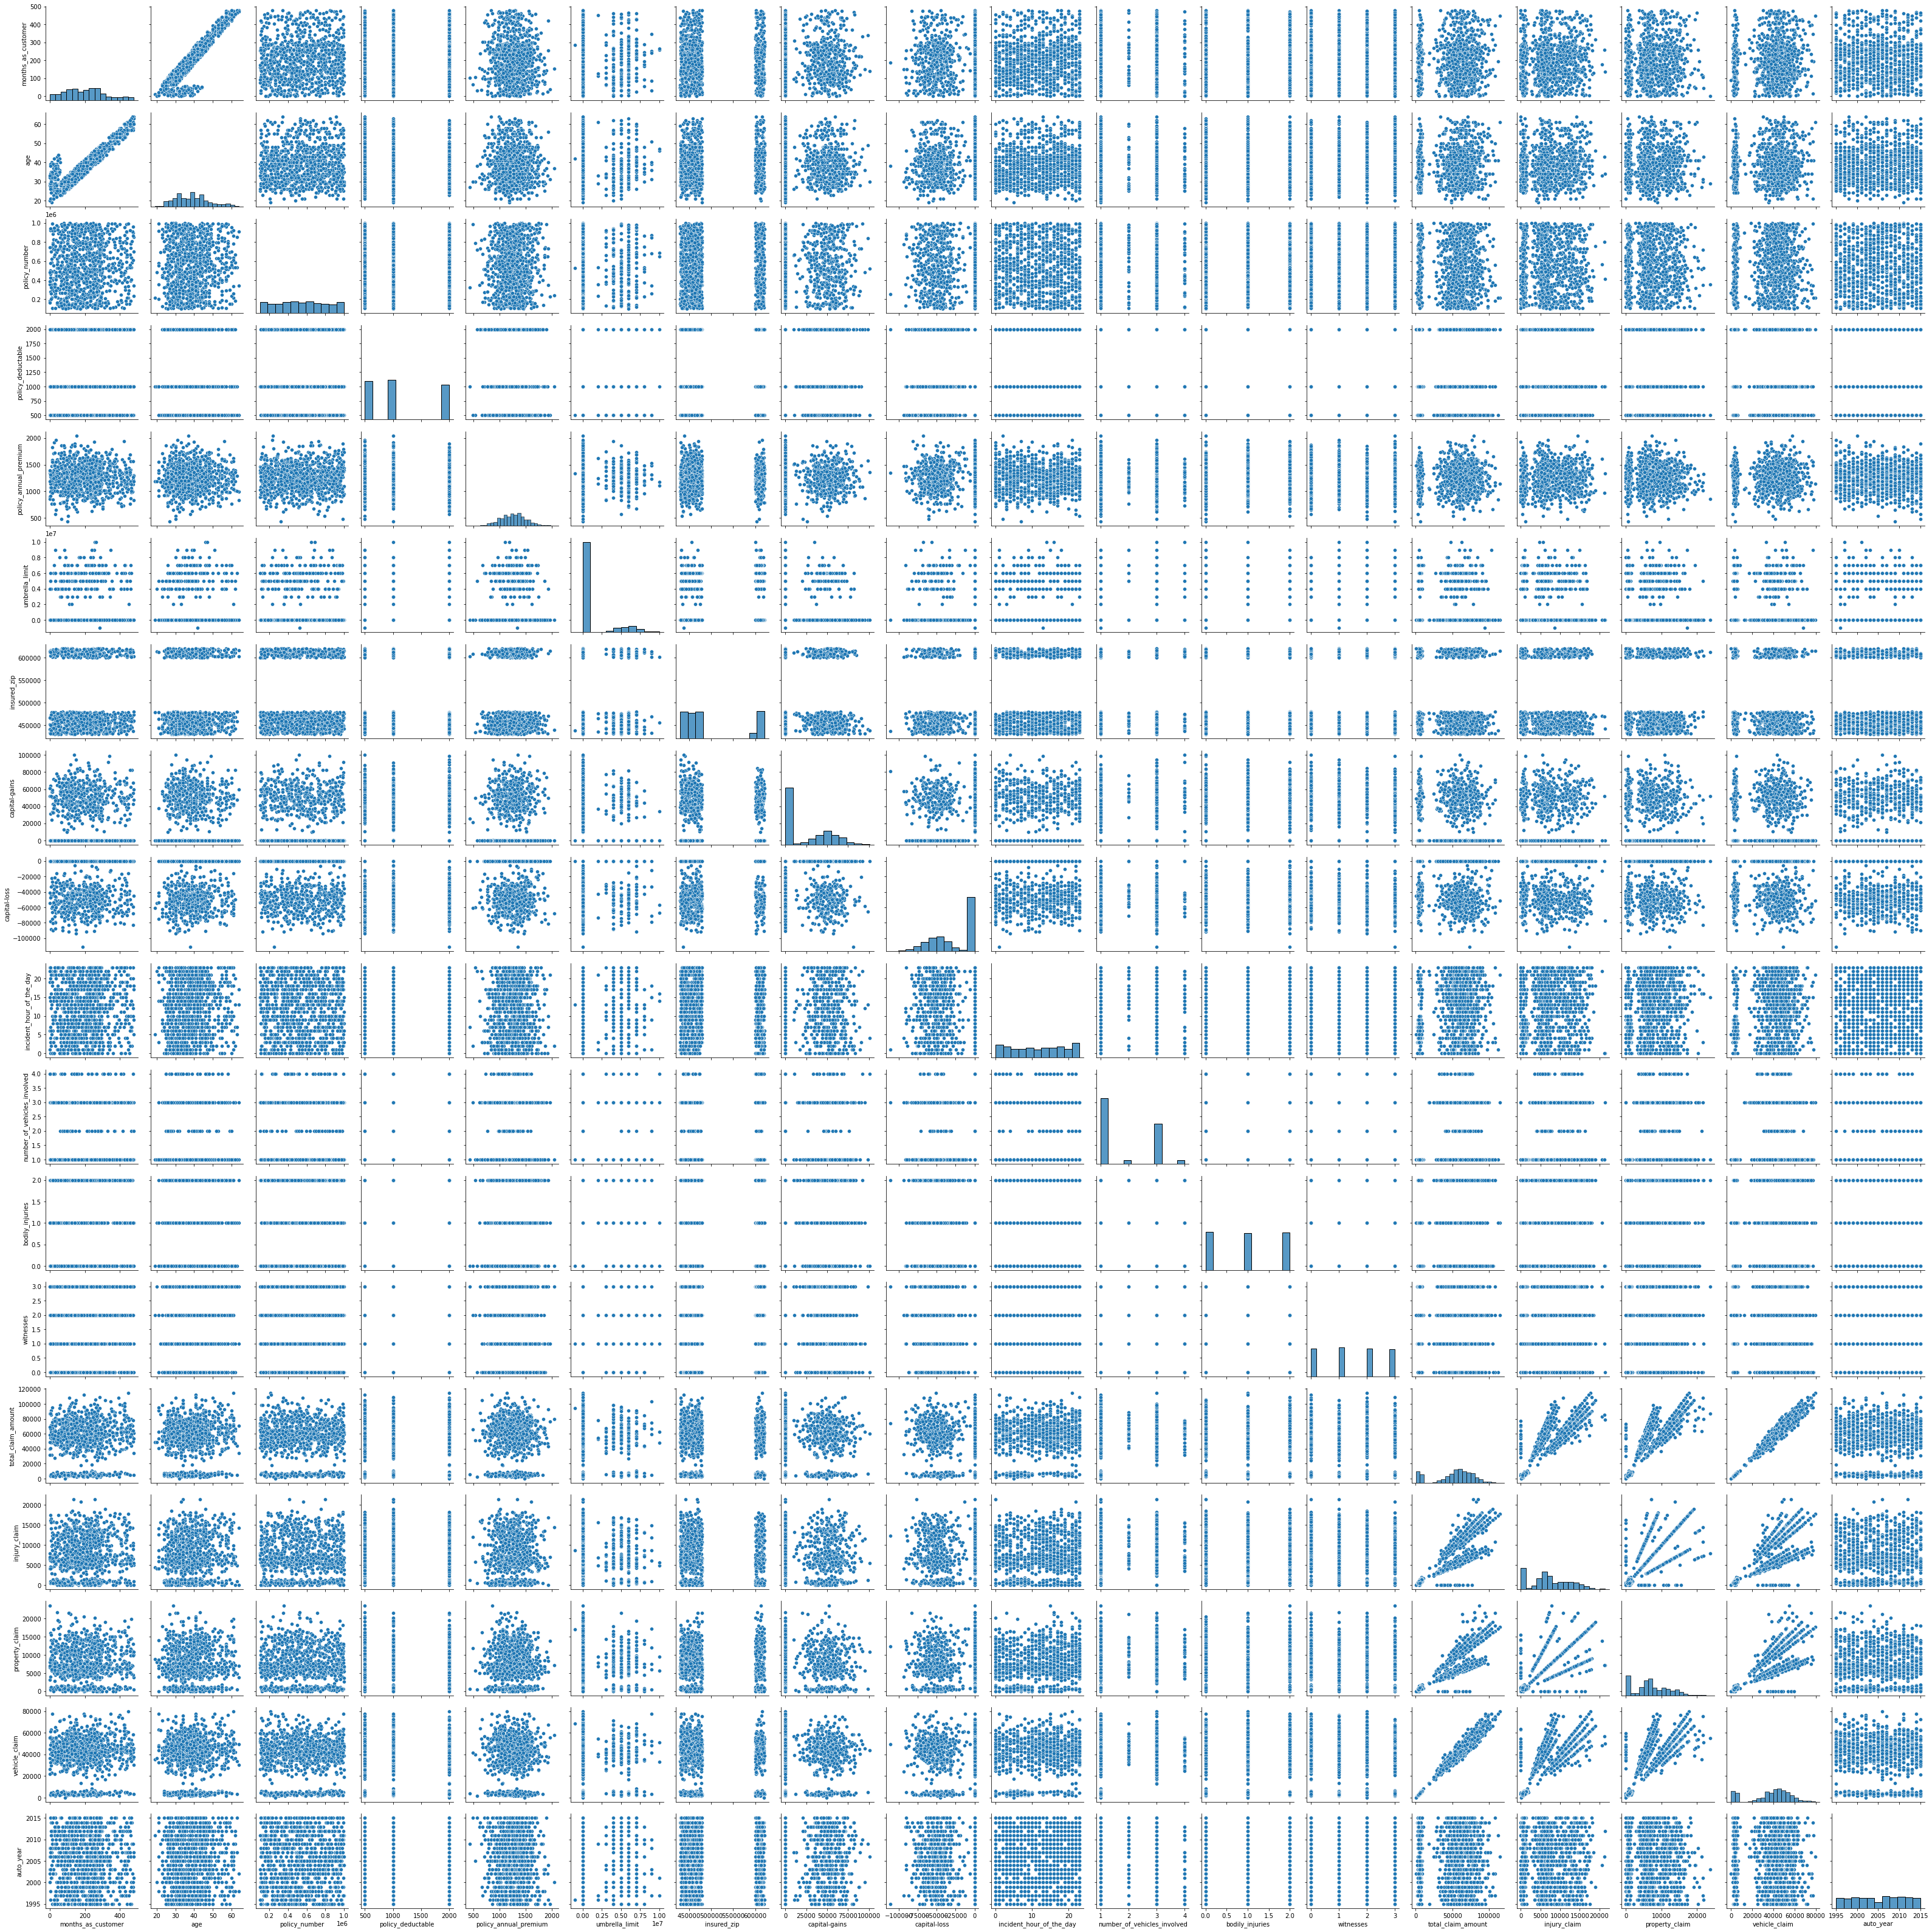

In [74]:
plt.figure(figsize= (20,20))
sns.pairplot(data= data)

### Data preprocessing

We will first drope the columns not having relevance with the Target. 

From  EDA we came to conclusion that months_as_customer, policy_number,policy_bind_date	, incident_date, incident_location,auto_model, auto_year  are not having direct relation with Fraud_reported. 

In [75]:
data.drop(['months_as_customer', 'policy_number','policy_bind_date', 'incident_date', 'incident_location','auto_model', 'auto_year','auto_make', 'umbrella_limit', 'insured_zip'], axis= 1 , inplace= True)

In [76]:
feature=data.drop('fraud_reported', axis=1)
target= data['fraud_reported']

In [77]:
data_new= pd.get_dummies(feature,sparse=False, drop_first=True )

In [78]:
data_new.shape

(1000, 87)

After applyign one hot encoder, now our data changes into (1000, 87)

In [79]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
Target = le.fit_transform(target)

In [80]:
data_new['fraud_reported']= Target

In [81]:
data_new.head(2)

age  policy_deductable  policy_annual_premium  capital-gains  capital-loss  \
0   48               1000                1406.91          53300             0   
1   42               2000                1197.22              0             0   

   incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
0                         5                            1                1   
1                         8                            1                0   

   witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0          2               71610          6510           13020          52080   
1          0                5070           780             780           3510   

   policy_state_IN  policy_state_OH  policy_csl_250/500  policy_csl_500/1000  \
0                0                1                   1                    0   
1                1                0                   1                    0   

   insured_sex_MALE  insured_education_level_College  \
0                 1                                0   
1                 1                                0   

   insured_education_level_High School  insured_education_level_JD  \
0                                    0                           0   
1                                    0                           0   

   insured_education_level_MD  insured_education_level_Masters  \
0                           1                                0   
1                           1                                0   

   insured_education_level_PhD  insured_occupation_armed-forces  \
0                            0                                0   
1                            0                                0   

   insured_occupation_craft-repair  insured_occupation_exec-managerial  \
0                                1                                   0   
1                                0                                   0   

   insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  \
0                                   0                                     0   
1                                   0                                     0   

   insured_occupation_machine-op-inspct  insured_occupation_other-service  \
0                                     0                                 0   
1                                     1                                 0   

   insured_occupation_priv-house-serv  insured_occupation_prof-specialty  \
0                                   0                                  0   
1                                   0                                  0   

   insured_occupation_protective-serv  insured_occupation_sales  \
0                                   0                         0   
1                                   0                         0   

   insured_occupation_tech-support  insured_occupation_transport-moving  \
0                                0                                    0   
1                                0                                    0   

   insured_hobbies_basketball  insured_hobbies_board-games  \
0                           0                            0   
1                           0                            0   

   insured_hobbies_bungie-jumping  insured_hobbies_camping  \
0                               0                        0   
1                               0                        0   

   insured_hobbies_chess  insured_hobbies_cross-fit  insured_hobbies_dancing  \
0                      0                          0                        0   
1                      0                          0                        0   

   insured_hobbies_exercise  insured_hobbies_golf  insured_hobbies_hiking  \
0                         0                     0                       0   
1                         0                     0                       0   

   insured_hobbies_kayaking  insured_hobbies_movies  \
0        

## Lets check Correlation

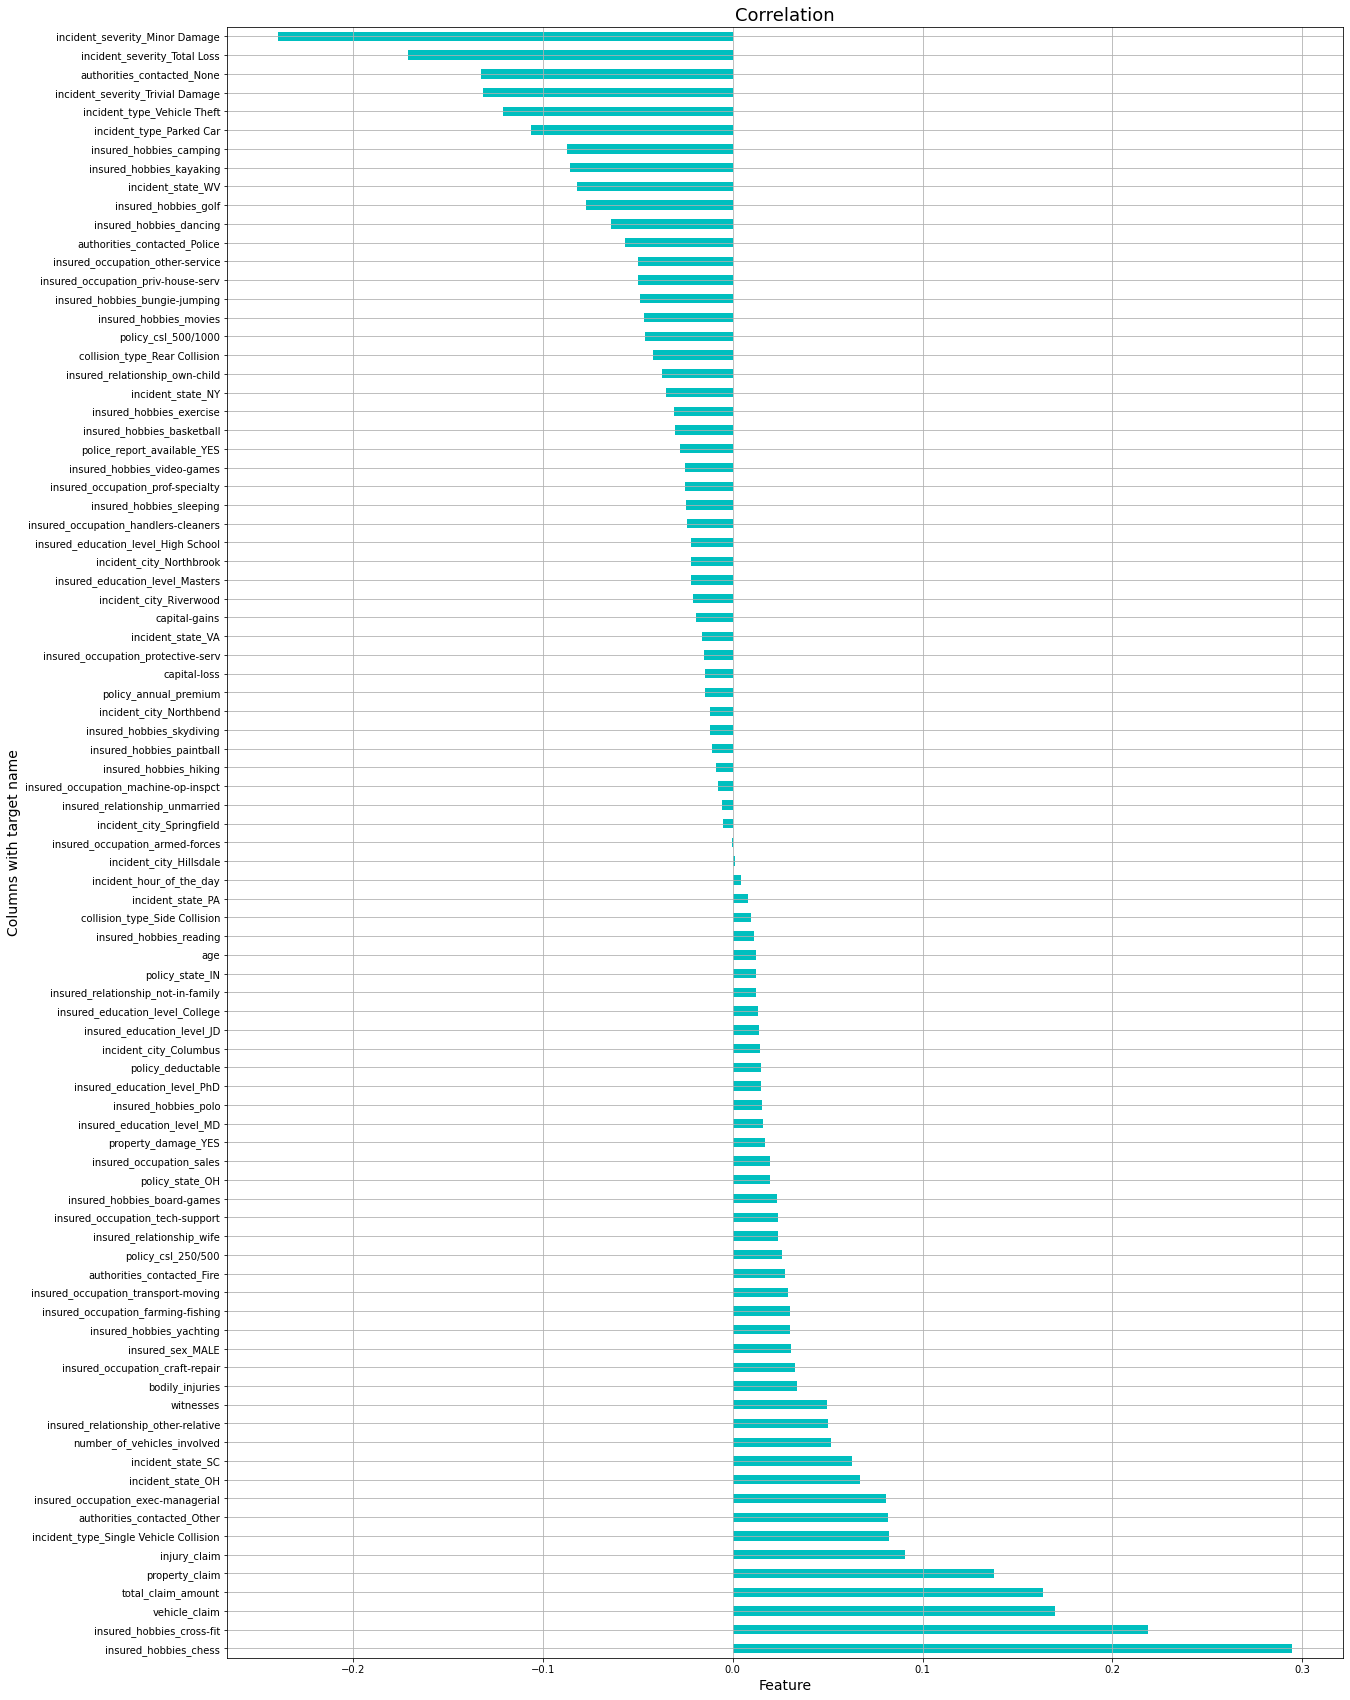

In [82]:
plt.figure(figsize=(20,30))
data_new.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='barh',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.grid(True)
plt.show()

Here we can see Features on the Right side of the 0.0 are having positive corelation with the targat,   
and Features on the left of the 0.0 are having negative or 0 correlation. 

### Checking Outliers

Here we be chaking Outliers present in the numerical columns. 

<AxesSubplot:>

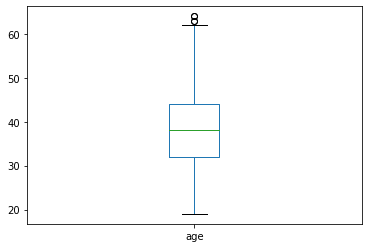

In [83]:
data_new['age'].plot.box()

<AxesSubplot:>

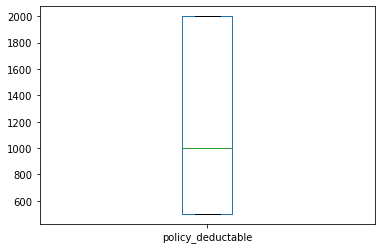

In [84]:
data_new['policy_deductable'].plot.box()

<AxesSubplot:>

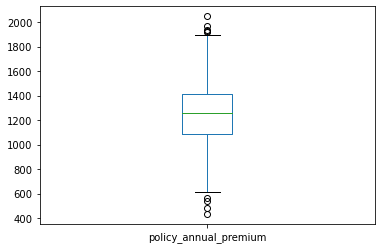

In [85]:
data_new['policy_annual_premium'].plot.box()

<AxesSubplot:>

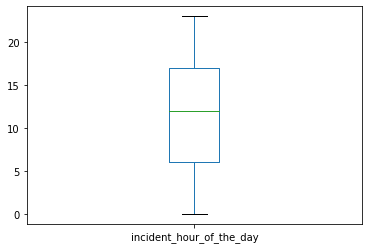

In [86]:
data_new['incident_hour_of_the_day'].plot.box()

<AxesSubplot:>

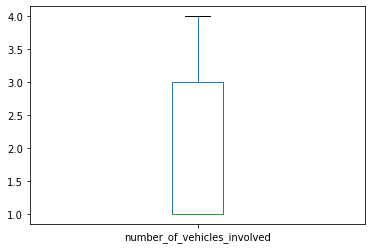

In [87]:
data_new['number_of_vehicles_involved'].plot.box()

<AxesSubplot:>

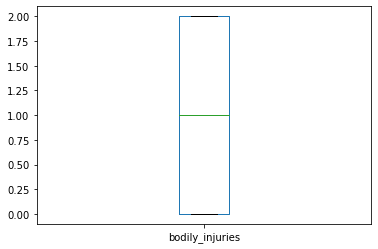

In [88]:
data_new['bodily_injuries'].plot.box()

<AxesSubplot:>

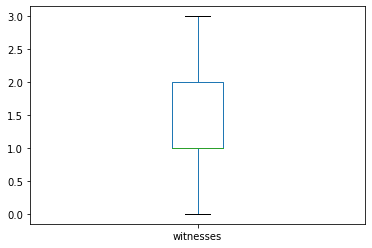

In [89]:
data_new['witnesses'].plot.box()

<AxesSubplot:>

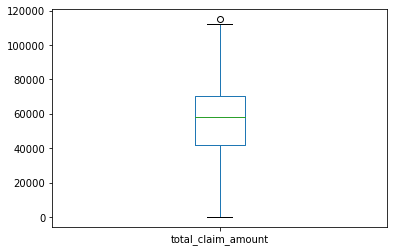

In [90]:
data_new['total_claim_amount'].plot.box()

<AxesSubplot:>

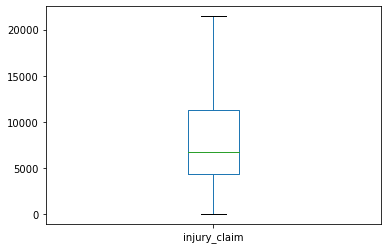

In [91]:
data_new['injury_claim'].plot.box()

<AxesSubplot:>

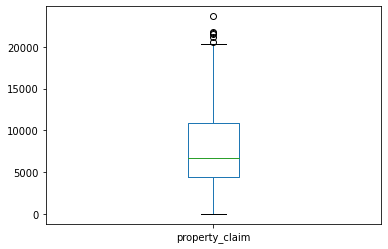

In [92]:
data_new['property_claim'].plot.box()

We can see very few outliers are present in Property Claim and policy_annual_premium,

### Checkign Skewness 

In [93]:
data.skew()

age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
dtype: float64

here we can see Only Umbrella unit , total claim amount , and vehicle claim having skewness. 

### Removing Skewness from the data

In [94]:
data_new['number_of_vehicles_involved'] = np.sqrt( data_new['number_of_vehicles_involved'] )

In [95]:
data_new['total_claim_amount'] = np.sqrt( data_new['total_claim_amount'] )

In [96]:
data_new['vehicle_claim'] = np.sqrt( data_new['vehicle_claim'] )

## Scaling the data Using StandardScaler and Using SMOTE

In [97]:
# Dividing into Feature and Target data
x=data_new.drop(['fraud_reported'],axis=1)
y=data_new['fraud_reported']

In [98]:
from sklearn.preprocessing import StandardScaler
SDC=StandardScaler()
x=SDC.fit_transform(x)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

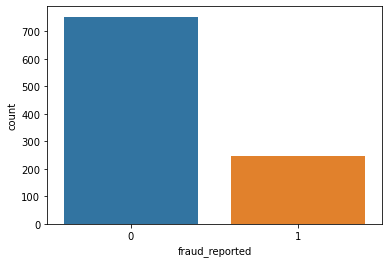

In [99]:
sns.countplot(y)

Here we can see our output is not balanced we will now use SMOTE to balance the output.

In [100]:
from imblearn.over_sampling import SMOTE
X_train_over, Y_train_over =SMOTE(k_neighbors=3).fit_resample(x,y)

In [101]:
X_train_over.shape

(1506, 87)

In [102]:
Y_train_over.shape

(1506,)

In [103]:
Y_train_over.value_counts()

0    753
1    753
Name: fraud_reported, dtype: int64

In [104]:
data_new.columns

Index(['age', 'policy_deductable', 'policy_annual_premium', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_state_IN', 'policy_state_OH', 'policy_csl_250/500',
       'policy_csl_500/1000', 'insured_sex_MALE',
       'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-spe

In [105]:
dfx=pd.DataFrame(data=X_train_over, columns=['age', 'policy_deductable', 'policy_annual_premium', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_state_IN', 'policy_state_OH', 'policy_csl_250/500',
       'policy_csl_500/1000', 'insured_sex_MALE',
       'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving', 'insured_hobbies_basketball',
       'insured_hobbies_board-games', 'insured_hobbies_bungie-jumping',
       'insured_hobbies_camping', 'insured_hobbies_chess',
       'insured_hobbies_cross-fit', 'insured_hobbies_dancing',
       'insured_hobbies_exercise', 'insured_hobbies_golf',
       'insured_hobbies_hiking', 'insured_hobbies_kayaking',
       'insured_hobbies_movies', 'insured_hobbies_paintball',
       'insured_hobbies_polo', 'insured_hobbies_reading',
       'insured_hobbies_skydiving', 'insured_hobbies_sleeping',
       'insured_hobbies_video-games', 'insured_hobbies_yachting',
       'insured_relationship_not-in-family',
       'insured_relationship_other-relative', 'insured_relationship_own-child',
       'insured_relationship_unmarried', 'insured_relationship_wife',
       'incident_type_Parked Car', 'incident_type_Single Vehicle Collision',
       'incident_type_Vehicle Theft', 'collision_type_Rear Collision',
       'collision_type_Side Collision', 'incident_severity_Minor Damage',
       'incident_severity_Total Loss', 'incident_severity_Trivial Damage',
       'authorities_contacted_Fire', 'authorities_contacted_None',
       'authorities_contacted_Other', 'authorities_contacted_Police',
       'incident_state_NY', 'incident_state_OH', 'incident_state_PA',
       'incident_state_SC', 'incident_state_VA', 'incident_state_WV',
       'incident_city_Columbus', 'incident_city_Hillsdale',
       'incident_city_Northbend', 'incident_city_Northbrook',
       'incident_city_Riverwood', 'incident_city_Springfield',
       'property_damage_YES', 'police_report_available_YES'])

In [106]:
dfx

age  policy_deductable  policy_annual_premium  capital-gains  \
0     0.990836          -0.222383               0.616705       1.011331   
1     0.334073           1.412784              -0.242521      -0.901927   
2    -1.088913           1.412784               0.642233       0.358023   
3     0.224613           1.412784               0.652886       0.853388   
4     0.552994          -0.222383               1.341980       1.467210   
...        ...                ...                    ...            ...   
1501 -0.172061          -0.749164               0.351637       1.476660   
1502  0.003907          -0.021320               1.072450      -0.901927   
1503  1.646586           1.412784               0.117573       0.820943   
1504  0.382449           1.412784               0.547768       0.572159   
1505  0.204894           1.012778              -0.813607       0.828368   

      capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0         0.953851                 -0.956261                    -0.832491   
1         0.953851                 -0.524475                    -0.832491   
2         0.953851                 -0.668404                     1.162352   
3        -1.267577                 -0.956261                    -0.832491   
4        -0.683741                  1.202666                    -0.832491   
...            ...                       ...                          ...   
1501     -0.838210                  0.626952                    -0.832491   
1502      0.452211                 -0.515806                    -0.832491   
1503     -1.879398                  1.058155                    -0.832491   
1504     -0.911670                 -0.656486                    -0.512886   
1505      0.953851                  1.026622                     1.162352   

      bodily_injuries  witnesses  total_claim_amount  injury_claim  \
0            0.009759   0.461838            0.678693     -0.189283   
1           -1.210174  -1.338700           -1.983392     -1.363822   
2            1.229693   1.362107           -0.425406      0.054644   
3            0.009759   0.461838            0.464436     -0.224130   
4           -1.210174  -0.438431           -1.855726     -1.257232   
...               ...        ...                 ...           ...   
1501        -0.424152   0.201993            0.657796      0.737630   
1502        -0.496888  -0.438431            0.858053      0.949241   
1503        -1.210174   0.461838            0.579744      0.019402   
1504         0.205212   0.317601            0.488074      0.020865   
1505         0.009759  -0.898240           -0.167748     -0.089554   

      property_claim  vehicle_claim  policy_state_IN  policy_state_OH  \
0           1.165505       0.700647        -0.670280         1.356801   
1          -1.372696      -2.006678         1.491914        -0.737028   
2          -0.736072      -0.520682        -0.670280         1.356801   
3          -0.219722       0.652588        -0.670280        -0.737028   
4          -1.399654      -1.875155        -0.670280        -0.737028   
...              ...            ...              ...              ...   
1501       -0.155311       0.739500         0.722854        -0.737028   
1502        0.967322       0.821504         0.593938        -0.737028   
1503        1.587739       0.449543        -0.670280         1.356801   
1504       -0.201117       0.638626        -0.670280        -0.401564   
1505       -0.645920      -0.148298        -0.141349        -0.737028   

      policy_csl_250/500  policy_csl_500/1000  insured_sex_MALE  \
0               1.359780            -0.654654          1.076953   
1               1.359780            -0.654654          1.076953   
2              -0.735413            -0.654654         -0.928546   
3               1.359780            -0.654654         -0.928546   
4              -0.735413             1.527525          1.076953   
...                  ...                  ...               ...  

## VIF Calculation

In [107]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [109]:
pd.set_option('display.max_rows', 500)

In [110]:
calc_vif(dfx)

variables   VIF FACTOR
0                                      age     1.158372
1                        policy_deductable     1.139786
2                    policy_annual_premium     1.125421
3                            capital-gains     1.116229
4                             capital-loss     1.149356
5                 incident_hour_of_the_day     1.199247
6              number_of_vehicles_involved    29.966983
7                          bodily_injuries     1.148183
8                                witnesses     1.152852
9                       total_claim_amount  2062.120194
10                            injury_claim    39.866660
11                          property_claim    38.397695
12                           vehicle_claim  1116.299514
13                         policy_state_IN     1.495172
14                         policy_state_OH     1.518125
15                      policy_csl_250/500     1.508616
16                     policy_csl_500/1000     1.475771
17                        insured_sex_MALE     1.126170
18         insured_education_level_College     1.934564
19     insured_education_level_High School     2.076683
20              insured_education_level_JD     2.076619
21              insured_education_level_MD     2.006376
22         insured_education_level_Masters     1.939335
23             insured_education_level_PhD     1.911149
24         insured_occupation_armed-forces     2.374470
25         insured_occupation_craft-repair     2.360704
26      insured_occupation_exec-managerial     2.674625
27      insured_occupation_farming-fishing     2.142598
28    insured_occupation_handlers-cleaners     1.880434
29    insured_occupation_machine-op-inspct     2.598296
30        insured_occupation_other-service     2.113683
31      insured_occupation_priv-house-serv     2.099497
32       insured_occupation_prof-specialty     2.147609
33      insured_occupation_protective-serv     2.000383
34                insured_occupation_sales     2.448795
35         insured_occupation_tech-support     2.335874
36     insured_occupation_transport-moving     2.258204
37              insured_hobbies_basketball     1.736859
38             insured_hobbies_board-games     2.154030
39          insured_hobbies_bungie-jumping     1.946405
40                 insured_hobbies_camping     1.849093
41                   insured_hobbies_chess     2.781133
42               insured_hobbies_cross-fit     2.160729
43                 insured_hobbies_dancing     1.698639
44                insured_hobbies_exercise     1.949934
45                    insured_hobbies_golf     1.915866
46                  insured_hobbies_hiking     1.949751
47                insured_hobbies_kayaking     1.884863
48                  insured_hobbies_movies     2.055059
49               insured_hobbies_paintball     2.188347
50                    insured_hobbies_polo     2.092780
51                 insured_hobbies_reading     2.337821
52               insured_hobbies_skydiving     1.955873
53                insured_hobbies_sleeping     1.842701
54             insured_hobbies_video-games     2.022539
55                insured_hobbies_yachting     2.334528
56      insured_relationship_not-in-family     1.912953
57     insured_relationship_other-relative     2.060114
58          insured_relationship_own-child     1.922376
59          insured_relationship_unmarried     1.838297
60               insured_relationship_wife     1.963246
61                incident_type_Parked Car    20.603399
62  incident_type_Single Vehicle Collision    29.947318
63             incident_type_Vehicle Theft    21.841813
64           collision_type_Rear Collision     2.200295
65           collision_type_Side Collision     1.809570
66          incident_severity_Minor Damage     1.657744
67            incident_severity_Total Loss     1.397390
68        incident_severity_Trivial Damage     2.554615
69              authorities_contacted_Fire     1.890504
70              authorities_contacted_None     2.852627
7

In [111]:
dfx.drop(['total_claim_amount'],axis=1, inplace= True)

In [112]:
calc_vif(dfx)

variables  VIF FACTOR
0                                      age    1.158363
1                        policy_deductable    1.139748
2                    policy_annual_premium    1.124737
3                            capital-gains    1.116120
4                             capital-loss    1.148896
5                 incident_hour_of_the_day    1.198913
6              number_of_vehicles_involved   29.923520
7                          bodily_injuries    1.146701
8                                witnesses    1.152849
9                             injury_claim    2.208373
10                          property_claim    2.285577
11                           vehicle_claim    9.577604
12                         policy_state_IN    1.492860
13                         policy_state_OH    1.517618
14                      policy_csl_250/500    1.508530
15                     policy_csl_500/1000    1.474845
16                        insured_sex_MALE    1.119377
17         insured_education_level_College    1.933881
18     insured_education_level_High School    2.076201
19              insured_education_level_JD    2.069241
20              insured_education_level_MD    2.005904
21         insured_education_level_Masters    1.939129
22             insured_education_level_PhD    1.908307
23         insured_occupation_armed-forces    2.367693
24         insured_occupation_craft-repair    2.354050
25      insured_occupation_exec-managerial    2.673337
26      insured_occupation_farming-fishing    2.138677
27    insured_occupation_handlers-cleaners    1.879809
28    insured_occupation_machine-op-inspct    2.595439
29        insured_occupation_other-service    2.108202
30      insured_occupation_priv-house-serv    2.087815
31       insured_occupation_prof-specialty    2.146908
32      insured_occupation_protective-serv    1.996052
33                insured_occupation_sales    2.447219
34         insured_occupation_tech-support    2.333677
35     insured_occupation_transport-moving    2.253798
36              insured_hobbies_basketball    1.736822
37             insured_hobbies_board-games    2.153848
38          insured_hobbies_bungie-jumping    1.946383
39                 insured_hobbies_camping    1.848061
40                   insured_hobbies_chess    2.780741
41               insured_hobbies_cross-fit    2.160427
42                 insured_hobbies_dancing    1.697754
43                insured_hobbies_exercise    1.949822
44                    insured_hobbies_golf    1.915497
45                  insured_hobbies_hiking    1.949749
46                insured_hobbies_kayaking    1.881956
47                  insured_hobbies_movies    2.054952
48               insured_hobbies_paintball    2.188159
49                    insured_hobbies_polo    2.091486
50                 insured_hobbies_reading    2.335347
51               insured_hobbies_skydiving    1.952228
52                insured_hobbies_sleeping    1.841370
53             insured_hobbies_video-games    2.020710
54                insured_hobbies_yachting    2.329729
55      insured_relationship_not-in-family    1.912869
56     insured_relationship_other-relative    2.059886
57          insured_relationship_own-child    1.922126
58          insured_relationship_unmarried    1.838148
59               insured_relationship_wife    1.963157
60                incident_type_Parked Car   13.973049
61  incident_type_Single Vehicle Collision   29.903584
62             incident_type_Vehicle Theft   14.779037
63           collision_type_Rear Collision    2.195575
64           collision_type_Side Collision    1.809398
65          incident_severity_Minor Damage    1.655748
66            incident_severity_Total Loss    1.396833
67        incident_severity_Trivial Damage    2.522814
68              authorities_contacted_Fire    1.890489
69              authorities_contacted_None    2.852043
70             authorities_contacted_Other    1.832955
71            authorities_contacted_Police    2.180457
72                

In [113]:
dfx.drop(['number_of_vehicles_involved'],axis=1, inplace= True)

In [114]:
calc_vif(dfx)

variables  VIF FACTOR
0                                      age    1.157440
1                        policy_deductable    1.137074
2                    policy_annual_premium    1.123995
3                            capital-gains    1.113936
4                             capital-loss    1.148722
5                 incident_hour_of_the_day    1.198495
6                          bodily_injuries    1.141761
7                                witnesses    1.148790
8                             injury_claim    2.207777
9                           property_claim    2.285422
10                           vehicle_claim    9.574689
11                         policy_state_IN    1.490368
12                         policy_state_OH    1.517602
13                      policy_csl_250/500    1.500163
14                     policy_csl_500/1000    1.474828
15                        insured_sex_MALE    1.117362
16         insured_education_level_College    1.929235
17     insured_education_level_High School    2.075835
18              insured_education_level_JD    2.069183
19              insured_education_level_MD    2.003627
20         insured_education_level_Masters    1.934075
21             insured_education_level_PhD    1.908054
22         insured_occupation_armed-forces    2.347251
23         insured_occupation_craft-repair    2.347950
24      insured_occupation_exec-managerial    2.669308
25      insured_occupation_farming-fishing    2.135486
26    insured_occupation_handlers-cleaners    1.878910
27    insured_occupation_machine-op-inspct    2.585079
28        insured_occupation_other-service    2.098354
29      insured_occupation_priv-house-serv    2.085006
30       insured_occupation_prof-specialty    2.134429
31      insured_occupation_protective-serv    1.982771
32                insured_occupation_sales    2.446427
33         insured_occupation_tech-support    2.321230
34     insured_occupation_transport-moving    2.246660
35              insured_hobbies_basketball    1.736769
36             insured_hobbies_board-games    2.140038
37          insured_hobbies_bungie-jumping    1.941056
38                 insured_hobbies_camping    1.830554
39                   insured_hobbies_chess    2.774628
40               insured_hobbies_cross-fit    2.160425
41                 insured_hobbies_dancing    1.693440
42                insured_hobbies_exercise    1.947737
43                    insured_hobbies_golf    1.914551
44                  insured_hobbies_hiking    1.949538
45                insured_hobbies_kayaking    1.875813
46                  insured_hobbies_movies    2.049868
47               insured_hobbies_paintball    2.173879
48                    insured_hobbies_polo    2.076938
49                 insured_hobbies_reading    2.333577
50               insured_hobbies_skydiving    1.948007
51                insured_hobbies_sleeping    1.832008
52             insured_hobbies_video-games    2.009769
53                insured_hobbies_yachting    2.326274
54      insured_relationship_not-in-family    1.906774
55     insured_relationship_other-relative    2.056440
56          insured_relationship_own-child    1.921550
57          insured_relationship_unmarried    1.837911
58               insured_relationship_wife    1.963021
59                incident_type_Parked Car    5.879337
60  incident_type_Single Vehicle Collision    1.326823
61             incident_type_Vehicle Theft    5.876703
62           collision_type_Rear Collision    2.173587
63           collision_type_Side Collision    1.808968
64          incident_severity_Minor Damage    1.655474
65            incident_severity_Total Loss    1.389398
66        incident_severity_Trivial Damage    2.522501
67              authorities_contacted_Fire    1.889547
68              authorities_contacted_None    2.851513
69             authorities_contacted_Other    1.832954
70            authorities_contacted_Police    2.177160
71                       incident_state_NY    2.775231
72                

Here we can see VIF is Less than 10 , we can proceed for model buiding 

In [115]:
x=dfx
y=Y_train_over

### Model Design

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

### Chosing Best Random State

In [117]:
lr= LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= i, test_size= 0.20)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",accuracy_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", accuracy_score(y_test,pred_test)*100)

At Random state  135 The Model performing Well
At Random State 135
Training Accuracy score is- 88.70431893687709
Testing Accuracy Score is- 88.74172185430463
At Random state  233 The Model performing Well
At Random State 233
Training Accuracy score is- 89.70099667774086
Testing Accuracy Score is- 89.73509933774835
At Random state  240 The Model performing Well
At Random State 240
Training Accuracy score is- 89.11960132890366
Testing Accuracy Score is- 89.0728476821192
At Random state  245 The Model performing Well
At Random State 245
Training Accuracy score is- 89.3687707641196
Testing Accuracy Score is- 89.40397350993378
At Random state  351 The Model performing Well
At Random State 351
Training Accuracy score is- 89.3687707641196
Testing Accuracy Score is- 89.40397350993378
At Random state  422 The Model performing Well
At Random State 422
Training Accuracy score is- 89.3687707641196
Testing Accuracy Score is- 89.40397350993378
At Random state  456 The Model performing Well
At Random

At Random State 16  
Training Accuracy score is- 89.3687707641196  
Testing Accuracy Score is- 89.40397350993378  

In [118]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y,random_state=16,test_size=0.20)

In [119]:
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(accuracy_score(y_test_b,lr_pred))

0.8576158940397351


In [120]:
from sklearn.metrics import classification_report 
print(confusion_matrix(y_test_b, lr_pred))
print(classification_report(y_test_b, lr_pred))

[[127  24]
 [ 19 132]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       151
           1       0.85      0.87      0.86       151

    accuracy                           0.86       302
   macro avg       0.86      0.86      0.86       302
weighted avg       0.86      0.86      0.86       302



### Cross validation of model.

In [121]:
lr_pred=lr.predict(x_test_b)
from sklearn.model_selection import cross_val_score
lr_score=accuracy_score(y_test_b,lr_pred)
for j in range(2,10):
    lr_cv= cross_val_score(lr,x,y,cv=j)
    lr_cvscore=lr_cv.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lr_cvscore*100)
    print("Accuracy Score:-", lr_score*100)
    print("\n")

at cv:- 2
Cross Validation scre is:- 86.71978751660026
Accuracy Score:- 85.76158940397352


at cv:- 3
Cross Validation scre is:- 87.71580345285524
Accuracy Score:- 85.76158940397352


at cv:- 4
Cross Validation scre is:- 87.38606862689768
Accuracy Score:- 85.76158940397352


at cv:- 5
Cross Validation scre is:- 87.78420716815913
Accuracy Score:- 85.76158940397352


at cv:- 6
Cross Validation scre is:- 87.45019920318725
Accuracy Score:- 85.76158940397352


at cv:- 7
Cross Validation scre is:- 87.12316968130922
Accuracy Score:- 85.76158940397352


at cv:- 8
Cross Validation scre is:- 87.454266576607
Accuracy Score:- 85.76158940397352


at cv:- 9
Cross Validation scre is:- 87.72098659823212
Accuracy Score:- 85.76158940397352




At cv:- 5
Cross Validation scre is:- 87.78420716815913   
Accuracy Score:- 85.76158940397352  


At cv: 5 Cross val score and Accuracy Score are having very less diffrence, But Still model performance not good, lets try anaother modle. 

### SVC

In [122]:
svc=SVC()
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=5, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 92.71523178807946
Cross val Score : 92.56694022133726


In [123]:
print(confusion_matrix(y_test_b, svc_pred))
print(classification_report(y_test_b, svc_pred))

[[137  14]
 [  8 143]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       151
           1       0.91      0.95      0.93       151

    accuracy                           0.93       302
   macro avg       0.93      0.93      0.93       302
weighted avg       0.93      0.93      0.93       302



Accuracy_core: 92.71523178807946  
Cross val Score : 92.56694022133726  
Still the diffrence is considerable, lets try another model  

### Ensemble Techniques

#### KNeighborsClassifier

In [124]:
kn=KNeighborsClassifier()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score:', kn_score*100)

kncvscore=cross_val_score(kn,x,y, cv=5, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 66.22516556291392
Cross val Score : 67.46452223273415


In [125]:
print(confusion_matrix(y_test_b, kn_pred))
print(classification_report(y_test_b, kn_pred))

[[ 52  99]
 [  3 148]]
              precision    recall  f1-score   support

           0       0.95      0.34      0.50       151
           1       0.60      0.98      0.74       151

    accuracy                           0.66       302
   macro avg       0.77      0.66      0.62       302
weighted avg       0.77      0.66      0.62       302



Model performance of very poor. lets try another.

### DecisionTreeClassifier

In [126]:
dt=DecisionTreeClassifier()
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=5, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 85.76158940397352
Cross val score is: 84.47074871840003


In [127]:
print(confusion_matrix(y_test_b, dt_pred))
print(classification_report(y_test_b, dt_pred))

[[125  26]
 [ 17 134]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       151
           1       0.84      0.89      0.86       151

    accuracy                           0.86       302
   macro avg       0.86      0.86      0.86       302
weighted avg       0.86      0.86      0.86       302



Accuracy_score 85.76158940397352  
Cross val score is: 84.47074871840003    

### RandomForestClassifier

In [128]:
rf=RandomForestClassifier()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=5, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  91.3907284768212
Cross val Score : 87.06585113638864


In [129]:
print(confusion_matrix(y_test_b, rf_pred))
print(classification_report(y_test_b, rf_pred))

[[142   9]
 [ 17 134]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       151
           1       0.94      0.89      0.91       151

    accuracy                           0.91       302
   macro avg       0.92      0.91      0.91       302
weighted avg       0.92      0.91      0.91       302



accuracy_score:  91.3907284768212  
Cross val Score : 87.06585113638864   
Both the score having huge diffrence, performance is poor, lets try another Model.   

### AdaBoostClassifier

In [130]:
ad=AdaBoostClassifier()
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x,y, cv=5, scoring='accuracy')
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  91.05960264900662
Cross val Score : 86.20228377813469


In [131]:
print(confusion_matrix(y_test_b, ad_pred))
print(classification_report(y_test_b, ad_pred))

[[137  14]
 [ 13 138]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       151
           1       0.91      0.91      0.91       151

    accuracy                           0.91       302
   macro avg       0.91      0.91      0.91       302
weighted avg       0.91      0.91      0.91       302



accuracy_score:  91.05960264900662  
Cross val Score : 86.20228377813469 
Both the score having huge diffrence, performance is poor, lets try another Model.  

### GaussianNB

In [132]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b, y_train_b)
gb_pred=gb.predict(x_test_b)

gb_score=accuracy_score(y_test_b, gb_pred)
print("Accuracy Score is:", gb_score*100)

gb_cv= cross_val_score(gb, x,y,cv=5, scoring='accuracy')
gb_cvscore=gb_cv.mean()
print("Cross Val Score is :", gb_cvscore*100)

Accuracy Score is: 70.52980132450331
Cross Val Score is : 73.97461001958152


In [133]:
print(confusion_matrix(y_test_b, gb_pred))
print(classification_report(y_test_b, gb_pred))

[[ 99  52]
 [ 37 114]]
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       151
           1       0.69      0.75      0.72       151

    accuracy                           0.71       302
   macro avg       0.71      0.71      0.70       302
weighted avg       0.71      0.71      0.70       302



Model score is less as compare to DecisionTreeClassifier, DecisionTreeClassifier is still best model.  

DecisionTreeClassifier and SVC are having good accurcay and performance, lets try hyper parameter tuning for both.

### Hyperparameter Tuning of the model.

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters= {'C':[0.1,1.0,1.5,2,2.5],'kernel':[ 'linear','poly', 'rbf', 'sigmoid'], 'random_state': list(range(0,5)), 'gamma':['scale', 'auto'],'decision_function_shape':['ovo', 'ovr']}
svc=SVC()
clf=GridSearchCV(svc, param_grid=parameters, n_jobs=-1)
clf.fit(x_train_b, y_train_b)
print(clf.best_params_)

{'C': 2, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 0}


In [136]:
scv=SVC(C=2,decision_function_shape='ovo', gamma='auto', kernel='rbf', random_state=0)
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=8, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 92.71523178807946
Cross val Score : 92.90217268940673


In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters= {'criterion':['gini', 'entropy'],'splitter':['best','random'],'max_features':['auto','sqrt','log2'], 'min_samples_leaf':list(range(0,5))}
dt=DecisionTreeClassifier()
dtclf=GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dtclf.fit (x_train_b, y_train_b)
print(dtclf.best_params_)  

{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'splitter': 'random'}


In [138]:
dt=DecisionTreeClassifier(criterion='entropy', max_features='auto', splitter= 'random', min_samples_leaf=1)
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=5, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 82.45033112582782
Cross val score is: 82.74383401905348


In [139]:
from sklearn.ensemble import RandomForestClassifier

parameters={'n_estimators' : [50,100,125,150,175,200],'criterion':['gini', 'entropy'],'max_features':['auto','sqrt', 'log2'], 'random_state':[10,20,30,40,50]}
rf=RandomForestClassifier()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 50, 'random_state': 30}


In [140]:
rf=RandomForestClassifier(criterion='entropy', max_features='log2', n_estimators=175, random_state=20)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=5, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  91.3907284768212
Cross val Score : 86.60359508041628


#### SVC with Accuracy_core: 92.71523178807946 Cross val Score : 92.56694022133726 is our best model.


### AUC ROC Curve:

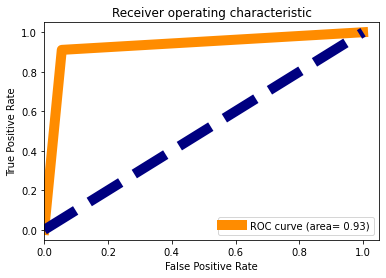

In [141]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(svc_pred, y_test_b)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=10,label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy', lw=10, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Saving Best Model

In [142]:
import pickle
filename="Evaluation_Project_Insurance_Claims_Fraud_Detection.pkl "
pickle.dump(svc, open(filename,'wb'))

In [143]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(svc.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

original  predicted
0           0          0
1           1          1
2           0          0
3           1          1
4           0          0
5           1          1
6           1          1
7           0          0
8           1          1
9           1          1
10          0          0
11          0          0
12          1          1
13          0          0
14          1          1
15          0          0
16          1          1
17          0          0
18          1          1
19          1          1
20          0          0
21          0          0
22          0          0
23          0          0
24          0          0
25          1          1
26          1          1
27          0          0
28          0          0
29          0          0
30          0          0
31          1          0
32          0          0
33          1          1
34          1          1
35          1          1
36          0          0
37          1          1
38          1          1
39          0          0
40          0          0
41          1          1
42          0          0
43          0          0
44          0          0
45          0          0
46          1          1
47          0          0
48          1          0
49          0          1
50          0          0
51          1          1
52          1          1
53          0          0
54          0          0
55          0          0
56          1          1
57          1          1
58          1          1
59          1          1
60          0          0
61          0          0
62          1          1
63          0          0
64          1          1
65          1          1
66          0          0
67          1          1
68          0          0
69          1          1
70          1          1
71          1          1
72          1          1
73          1          1
74          0          0
75          0          0
76          0          0
77          1          1
78          1          1
79          0          0
80          0          1
81          1          0
82          1          1
83          1          1
84          1          1
85          1          1
86          0          0
87          0          0
88          1          1
89          1          1
90          0          0
91          0          0
92          0          0
93          0          0
94          1          1
95          1          1
96          0          0
97          1          1
98          0          0
99          1          1
100         1          1
101         1          1
102         0          0
103         1          1
104         0          0
105         0          0
106         1          1
107         1          1
108         0          0
109         0          0
110         1          1
111         0          0
112         0          0
113         1          1
114         0          0
115         1          1
116         0          0
117         1          1
118         0          0
119         1          1
120         1          1
121         0          0
122         0          0
123         0          0
124         1          1
125         1          1
126         0          0
127         1          1
128         0          0
129         0          0
130         0          0
131         1          1
132         1          1
133         0          1
134         0          0
135         0          0
136         1          1
137         0          0
138         1          1
139         0          0
140         0          0
141         1          1
142         0          0
143         1          0
144         1          1
145         0          0
146         1          1
147         0          0
148         0          0
149         0          0
150         0          0
151         0          0
152         1          1
153         0          0
154         0          0
155         0          0
156         1          1
157         1          1
158         0          0
159  